In [3]:
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import operator
import random
import os
import pandas

1.1

In [4]:
with np.load('./data/step_00.npz') as data:
    acc = data['acc']
    gyr = data['gyr']
    hrm = data['hrm']

In [10]:
fs1 = 20
fs2 = 5
n_acc = np.linspace(0,acc.shape[0],acc.shape[0])
n_gyr = np.linspace(0,gyr.shape[0],gyr.shape[0])
n_hrm = np.linspace(0,hrm.shape[0],hrm.shape[0])

In [35]:
labels = ['X','Y','Z']

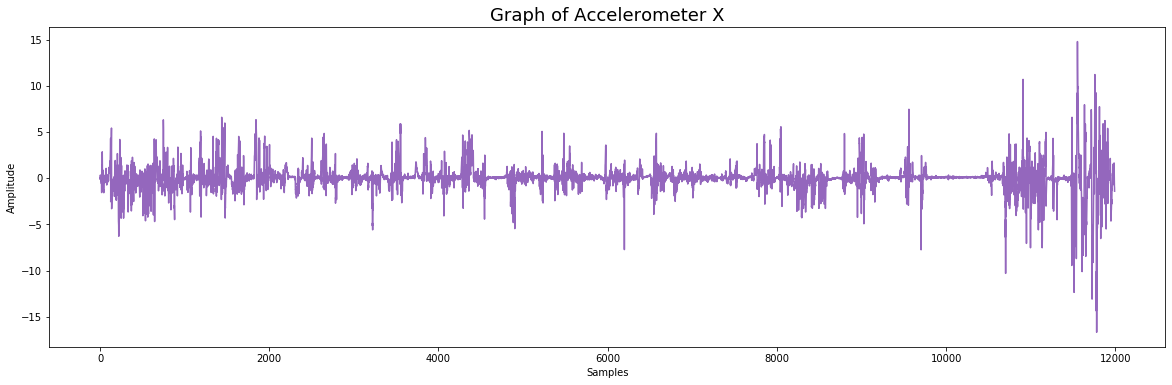

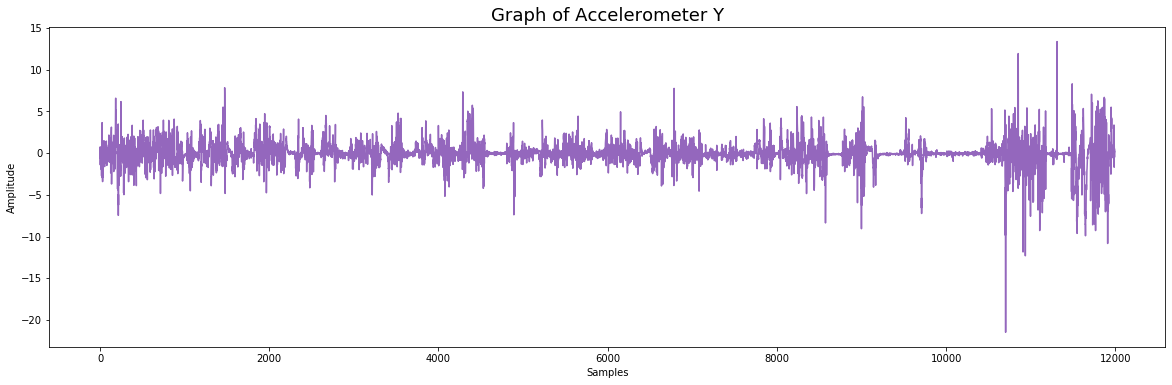

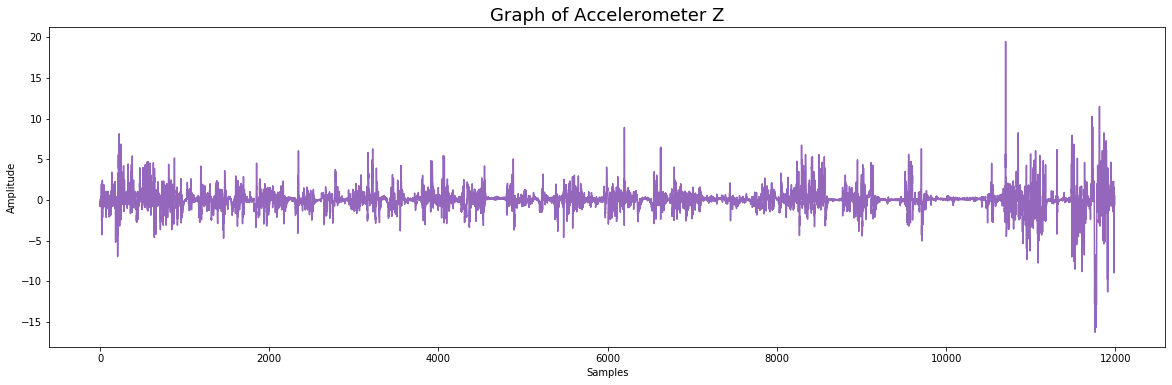

In [37]:
j=1
for i in range (0,3):
    fig = plt.figure(figsize = (20,20))
    plt.subplot(3,1,j)
    plt.plot(n_acc,acc[:,i],color='C4')
    plt.title("Graph of Accelerometer "+labels[i], fontsize=18)
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    j+=1

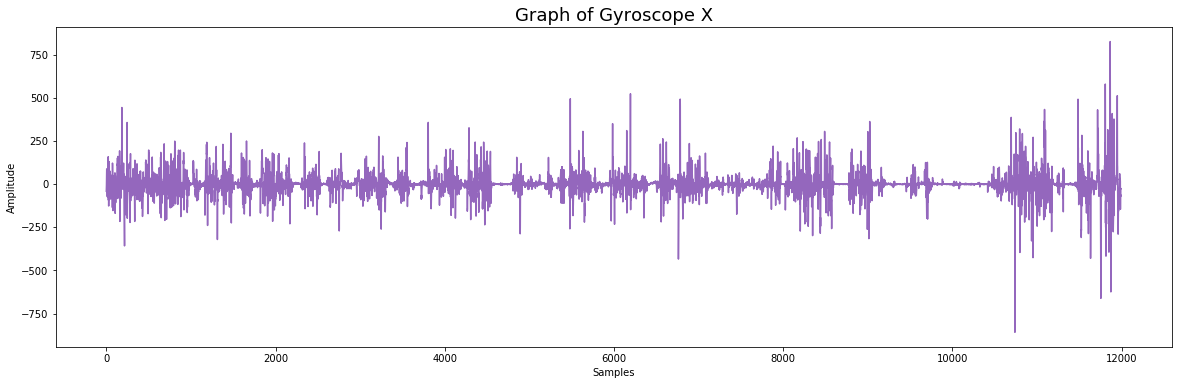

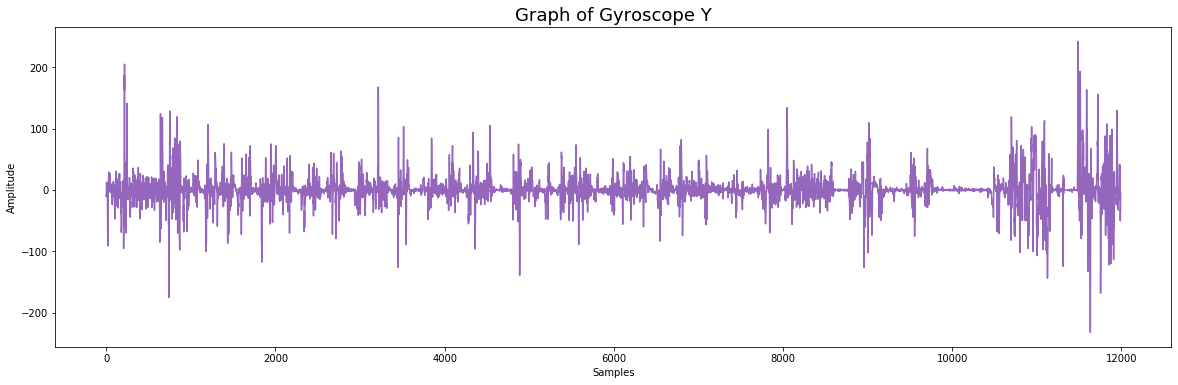

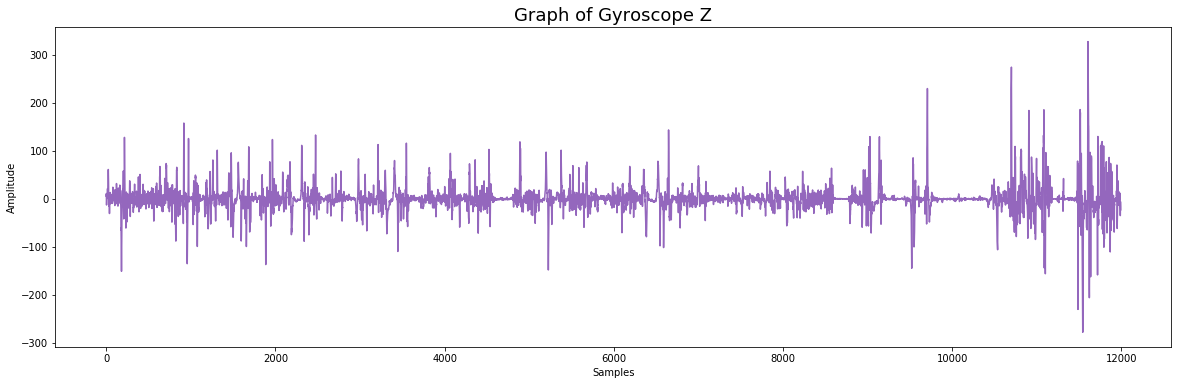

In [67]:
j=1
for i in range (0,3):
    fig = plt.figure(figsize = (20,20))
    plt.subplot(3,1,j)
    plt.plot(n_gyr,gyr[:,i],color='C4')
    plt.title("Graph of Gyroscope "+labels[i], fontsize=18)
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    j+=1

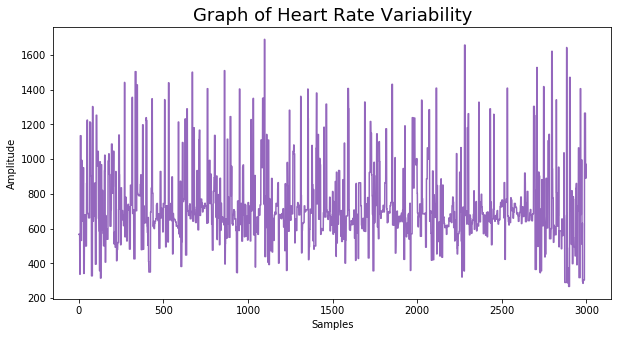

In [40]:
fig = plt.figure(figsize = (10,5))
plt.plot(n_hrm,hrm,color='C4')
plt.title("Graph of Heart Rate Variability", fontsize=18)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

1.2

In [49]:
def ste(x,window,fs):
    samples = window * fs
    hammingw = np.hamming(samples)
    ste = np.convolve(x**2, hammingw, mode = 'same')
    return ste,samples

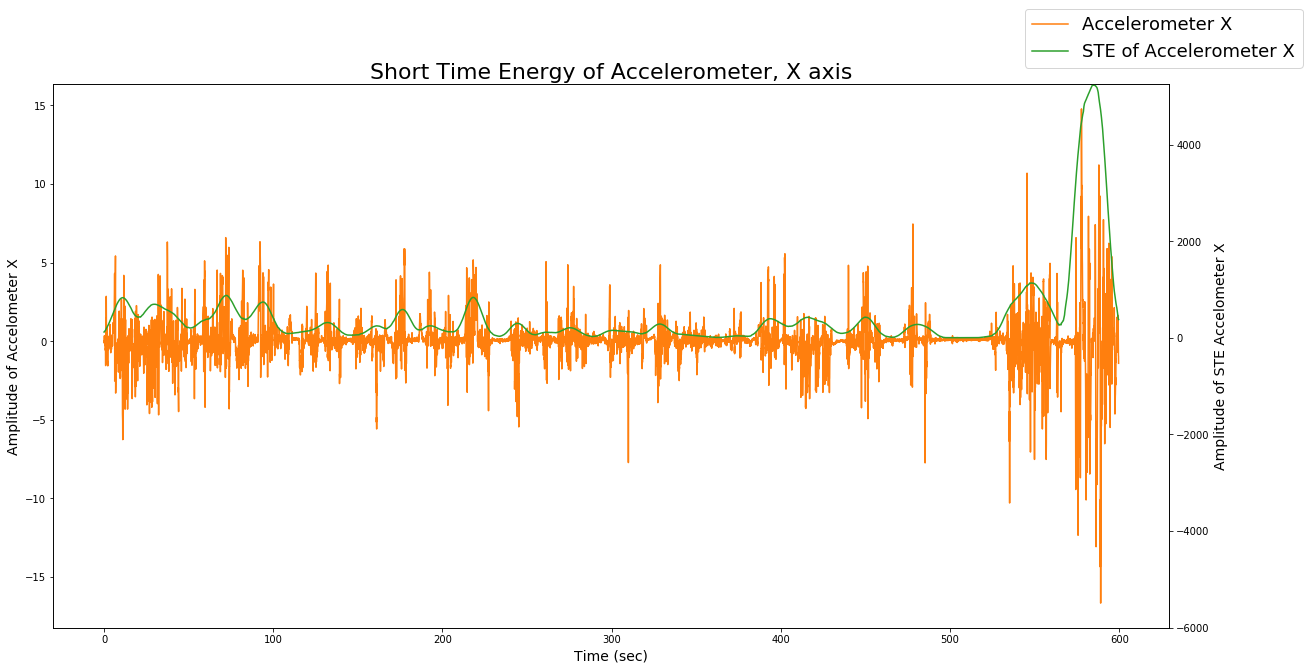

In [56]:
ste_a,samples_a = ste(acc[:,0],20, fs1)
t=np.linspace(0,len(ste_a)/fs1,len(ste_a))
fig=plt.figure(figsize = (20,10))
ax1 =fig.add_subplot(111)
ax1.plot(t,acc[:,0],color='C1',label='Accelerometer X')
ax2=ax1.twinx()
ax2.plot(t,ste_a,color='C2',label='STE of Accelerometer X')
ax2.set_ylim(-min(ste_a)-6000,max(ste_a))
ax1.set_ylabel(r"Amplitude of Accelometer X",fontsize=14)
ax2.set_ylabel(r"Amplitude of STE Accelometer X",fontsize=14)
fig.legend(fontsize=18)
plt.title("Short Time Energy of Accelerometer, X axis", fontsize=22)
ax1.set_xlabel("Time (sec)",fontsize=14)
plt.show()

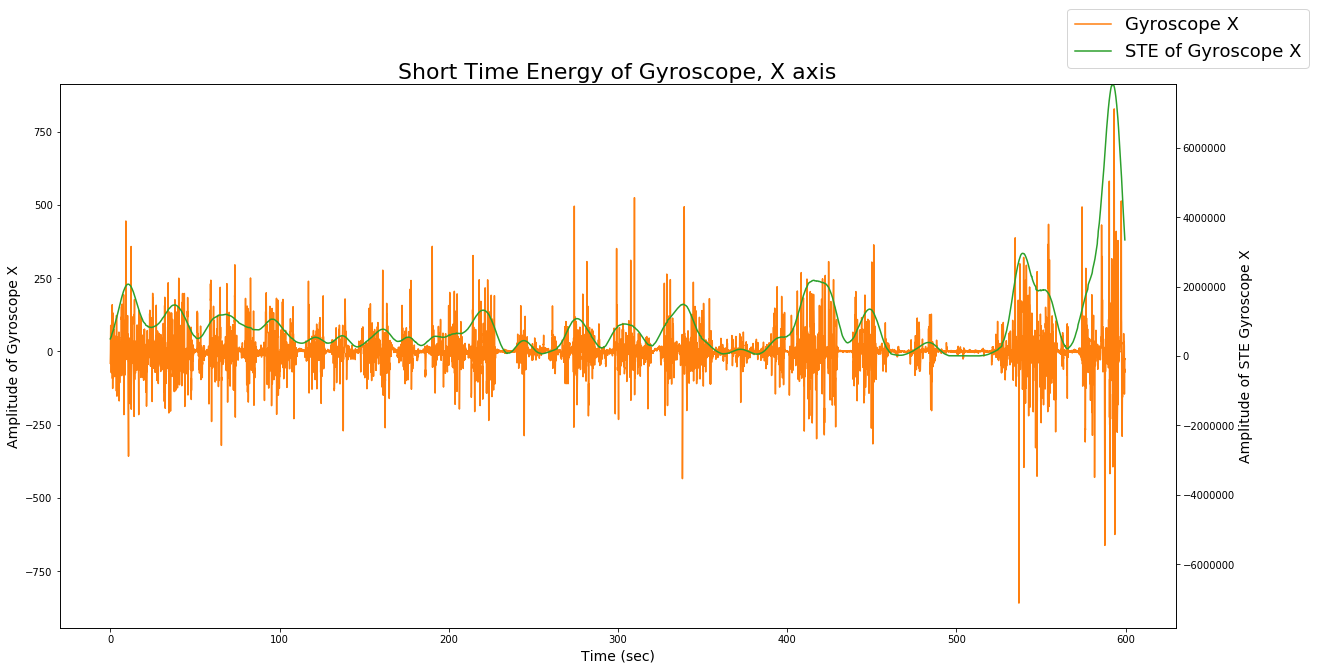

In [68]:
ste_g,samples = ste(gyr[:,0],20, fs1)
t=np.linspace(0,len(ste_g)/fs1,len(ste_g))
fig=plt.figure(figsize = (20,10))
ax1 =fig.add_subplot(111)
ax2=ax1.twinx()
ax2.set_ylim(-max(ste_g),max(ste_g))
ax1.plot(t,gyr[:,0],color='C1',label='Gyroscope X')
ax2.plot(t,ste_g,color='C2', label='STE of Gyroscope X')
ax1.set_ylabel(r"Amplitude of Gyroscope X",fontsize=14)
ax2.set_ylabel(r"Amplitude of STE Gyroscope X",fontsize=14)
fig.legend(fontsize=18)
plt.title("Short Time Energy of Gyroscope, X axis", fontsize=22)
ax1.set_xlabel("Time (sec)",fontsize=14)
plt.show()

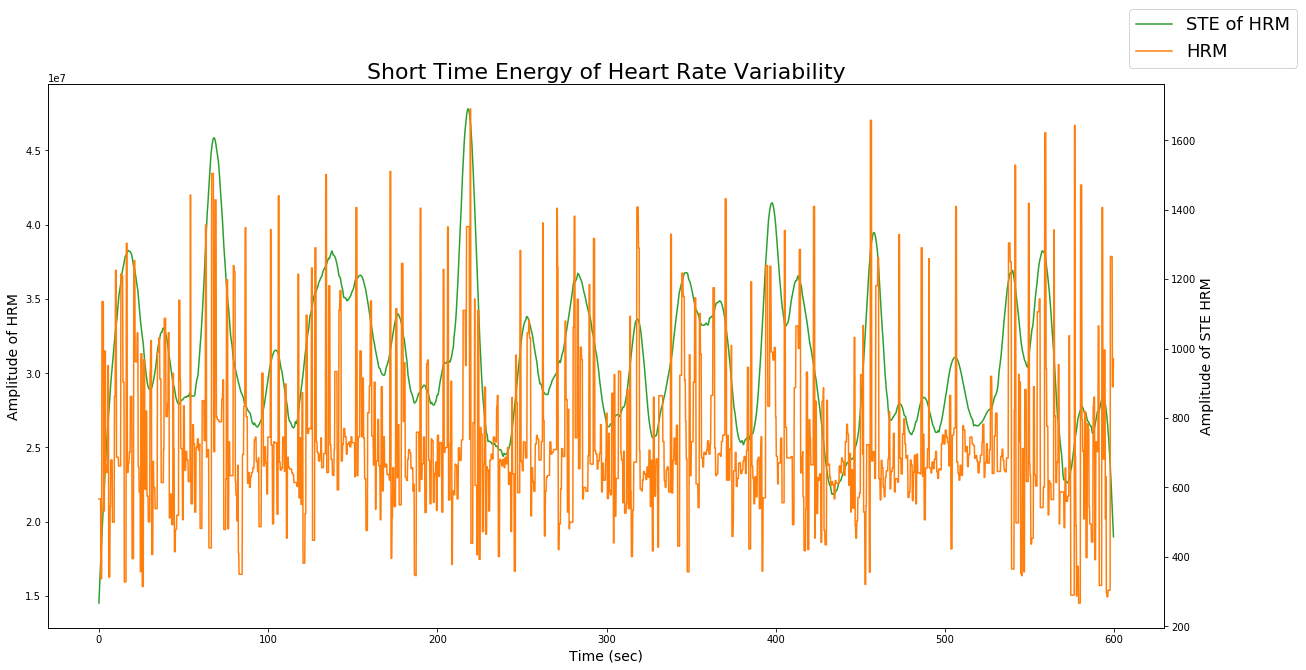

In [71]:
ste_h,samples = ste(hrm,20, fs2)
t=np.linspace(0,len(ste_h)/fs2,len(ste_h))
fig=plt.figure(figsize = (20,10))
ax1 =fig.add_subplot(111)
ax1.plot(t,ste_h,color='C2',label='STE of HRM')
ax2=ax1.twinx()
ax2.plot(n_hrm/fs2,hrm,color='C1',label='HRM')
ax1.set_ylabel(r"Amplitude of HRM",fontsize=14)
ax2.set_ylabel(r"Amplitude of STE HRM",fontsize=14)
fig.legend(fontsize=18)
plt.title("Short Time Energy of Heart Rate Variability", fontsize=22)
ax1.set_xlabel("Time (sec)",fontsize=14)
plt.show()

1.3

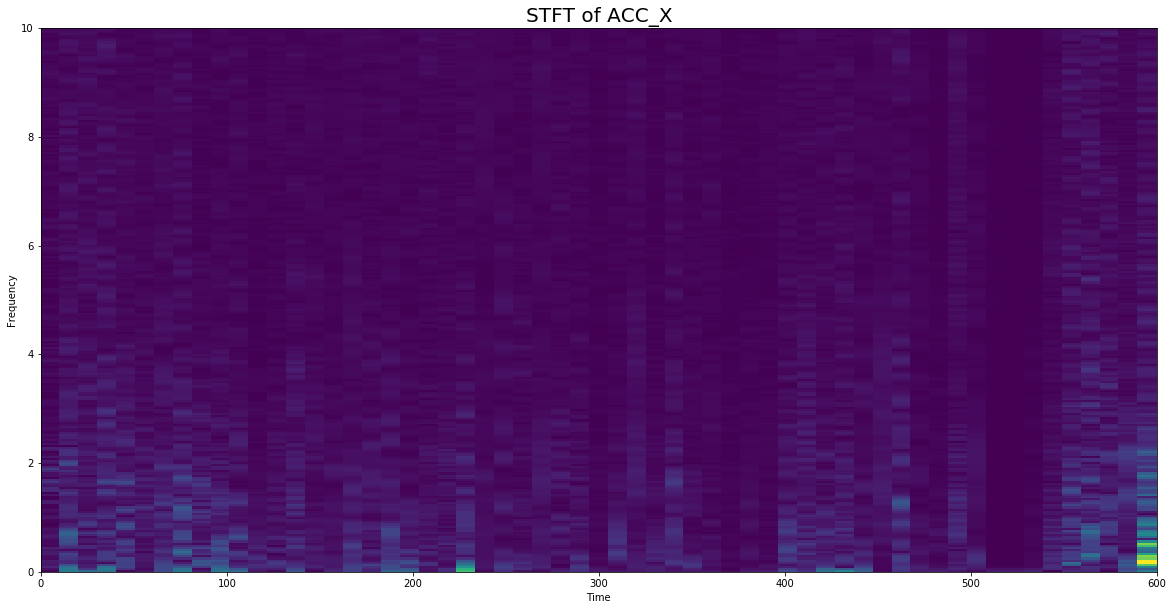

In [72]:
ACC = librosa.core.stft(acc[:,0], n_fft=512, hop_length = 200 , win_length = 400)
f = np.linspace(0,fs1/2,ACC.shape[0])
t = np.linspace(0,600,ACC.shape[1]) 
fig= plt.figure(figsize=(20,10))
plt.pcolormesh(t,f,abs(ACC))
plt.title("STFT of ACC_Χ", fontsize=20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

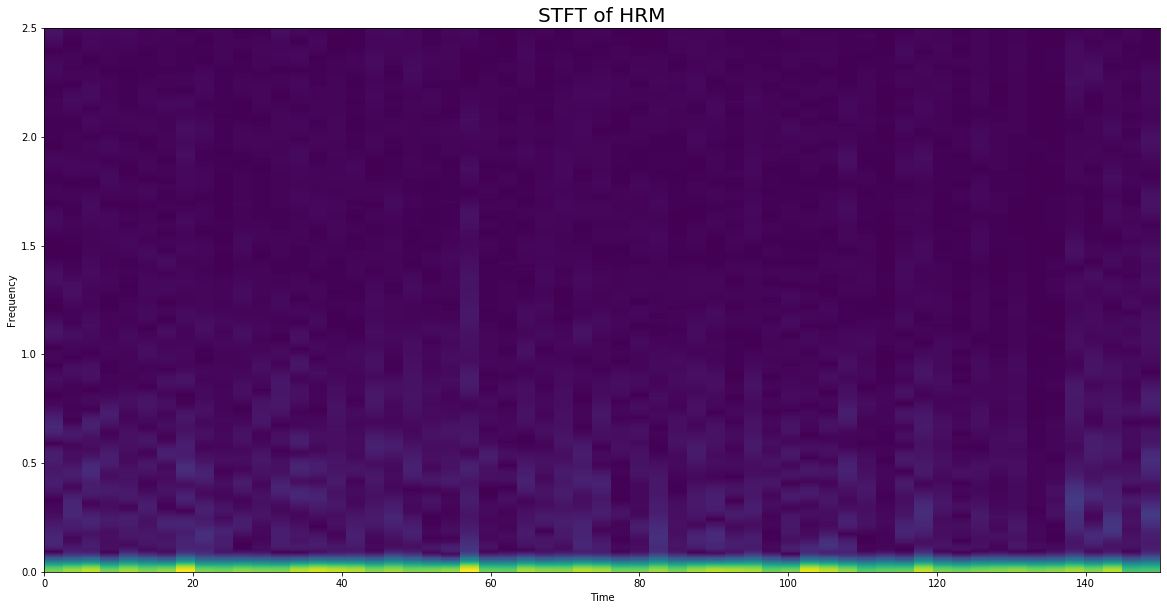

In [15]:
HRM = librosa.core.stft(hrm, n_fft=1024, hop_length = 50 , win_length = 100)
f = np.linspace(0,fs2/2,HRM.shape[0])
t = np.linspace(0,150,HRM.shape[1]) 
fig= plt.figure(figsize=(20,10))
plt.pcolormesh(t,f,abs(HRM))
plt.title("STFT of HRM", fontsize=20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

1.4

In [92]:
with np.load('./data/step_03.npz') as data:
    acc = data['acc']
    gyr = data['gyr']
    hrm = data['hrm']

In [93]:
def characteristic(x,w,fs):
    ch=[]
    a,b = stnrg(x,w,fs)
    ch.append(np.mean(a))
    ch.append(np.min(a))
    ch.append(np.max(a))
    ch.append(np.std(a))
    return ch

In [94]:
step_result = np.zeros((7,4))
for i in range (0,3):
    step_result[i]=characteristic(acc[:,i],20,fs1)
for i in range (0,3):
    step_result[i+3]=characteristic(gyr[:,i],20,fs1)
step_result[i+4]=characteristic(hrm,20,fs2)

result = np.zeros((14,4))
for i in range (0,7):
    for j in range (0,4):
        result[i][j] = step_result[i][j]

In [95]:
with np.load('./data/sleep_03.npz') as data:
    acc = data['acc']
    gyr = data['gyr']
    hrm = data['hrm']

In [96]:
step_result = np.zeros((7,4))
for i in range (0,3):
    step_result[i]=characteristic(acc[:,i],20,fs1)
for i in range (0,3):
    step_result[i+3]=characteristic(gyr[:,i],20,fs1)
step_result[i+4]=characteristic(hrm,20,fs2)

for i in range (0,7):
    for j in range (0,4):
        result[i+7][j] = step_result[i][j]

In [97]:
column_labels = ['Mean Value','Min Value','Max Value','Std Value']
row_labels = ['Step Acc_X','Step Acc_Y','Step Acc_Z','Step Gyr_X','Step Gyr_Y','Step Gyr_Z','Step Hrm','Sleep Acc5_X','Sleep Acc_Y','Sleep Acc_Z','Sleep Gyr_X','Sleep Gyr_Y','Sleep Gyr_Z','Sleep Hrm']

In [98]:
df = pandas.DataFrame(result, columns=column_labels, index=row_labels)
pandas.options.display.float_format = "{:,.5f}".format
df

Mean Value        Min Value        Max Value  \
Step Acc_X        1,126.94248         66.80452      6,092.79513   
Step Acc_Y          769.82196        128.44524      2,915.05278   
Step Acc_Z          636.96294          3.53944      3,224.28695   
Step Gyr_X    1,105,351.58048      6,437.60966  4,197,423.40492   
Step Gyr_Y      207,221.43496      3,462.23230  1,116,521.34016   
Step Gyr_Z      226,421.92641        845.15532  1,230,769.25763   
Step Hrm     31,907,595.04192 14,408,017.89647 58,518,222.08870   
Sleep Acc5_X          3.88799          0.48579         47.56791   
Sleep Acc_Y           1.27609          0.16027         14.39163   
Sleep Acc_Z           4.05188          0.13897         72.36984   
Sleep Gyr_X       1,387.70812          3.66413     22,986.41463   
Sleep Gyr_Y         114.98366          3.58993      1,428.98500   
Sleep Gyr_Z         132.46216          1.77798      1,974.68827   
Sleep Hrm    55,590,032.72060 26,211,056.51654 72,988,817.36109   

                   Std Value  
Step Acc_X         972.99609  
Step Acc_Y         574.27766  
Step Acc_Z         542.11165  
Step Gyr_X     883,185.32408  
Step Gyr_Y     180,988.10355  
Step Gyr_Z     255,457.99962  
Step Hrm     7,873,857.73516  
Sleep Acc5_X         5.90927  
Sleep Acc_Y          2.45510  
Sleep Acc_Z          8.20234  
Sleep Gyr_X      3,661.30646  
Sleep Gyr_Y        260.76669  
Sleep Gyr_Z        348.21925  
Sleep Hrm    5,658,254.15632

Part 2

Task 2.1

In [23]:
with np.load('./data/step_00.npz') as data:
    acc = data['acc']
    gyr = data['gyr']
    hrm = data['hrm']
    
accx = acc[:,0]
gyrx = gyr[:,0]

Task 2.2

In [24]:
def teo(signal):
    teo_sign = np.copy(signal)
    teo_sign[1:-1] = signal[1:-1]**2 - signal[2:]*signal[:-2]
    teo_sign[0],teo_sign[-1] = teo_sign[1],teo_sign[-2]
    
    return teo_sign

Task 2.3

In [25]:
def gaborfilt(signal, a,fc ,fs):
    b = a/fs
    Wc = 2*np.pi*fc/fs
    N = int(3/b+1)
    n = np.linspace(-N,N,2*N+1)
    h1 = np.exp(-(b**2)*(n**2))
    h2 = np.cos(Wc*n)
    h = h1*h2
    H = np.abs(np.fft.fft(h,len(signal)))
    H = H[0:len(signal)//2]
    gabor_signal = sp.signal.lfilter(h,1,signal)
    return gabor_signal, H

In [26]:
def gabor_bank(signal,K,fs):
    a = fs/2/K
    fc_min = a/2
    fc_max = (fs-a)/2
    Fc = list(np.linspace(fc_min,fc_max,25))
    gabor = np.zeros((K,len(signal)))
    gabor_spectrum = np.zeros((K,len(signal)//2))
    i = 0
    for fc in Fc:
        gabor[i], gabor_spectrum[i] = gaborfilt(signal, a, fc, fs)
        i+=1
    #print(gabor[0][1])
    return gabor, gabor_spectrum

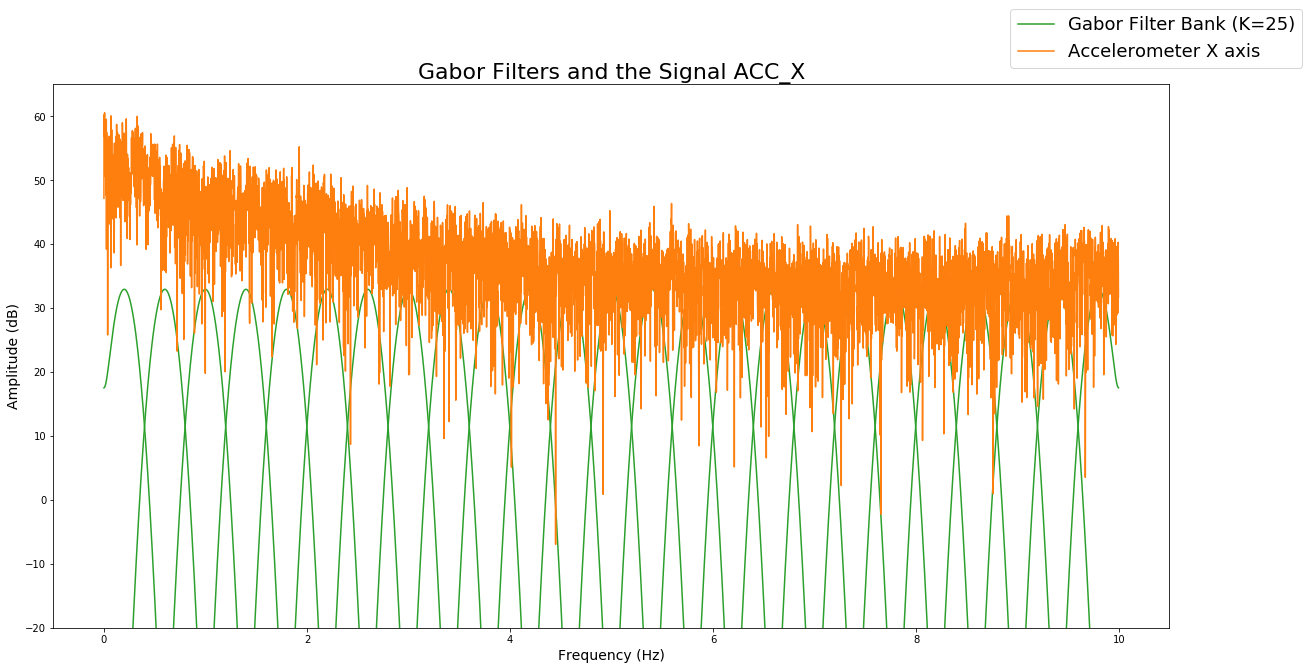

In [113]:
fs1 = 20
fs2 = 5
K = 25
X = np.fft.fft(accx)
X = X[:len(X)//2]
fig= plt.figure(figsize=(20,10))
gabor, gabor_spectrum = gabor_bank(accx, K, fs1)
f = np.linspace(0, len(X)/600, len(X))
axes = plt.gca()
axes.set_ylim([-20,65])
plt.plot(f, 20*np.log10((gabor_spectrum[0])), color='C2',label = "Gabor Filter Bank (K=25)")
for i in range(1,25):
    plt.plot(f, 20*np.log10((gabor_spectrum[i])), color='C2')
plt.plot(f,20*np.log10(np.abs(X)),label = "Accelerometer X axis",color = 'C1')
fig.legend(fontsize=18)
plt.title("Gabor Filters and the Signal ACC_X", fontsize=22)
plt.xlabel("Frequency (Hz)",fontsize=14)
plt.ylabel("Amplitude (dB)",fontsize=14)
plt.show()

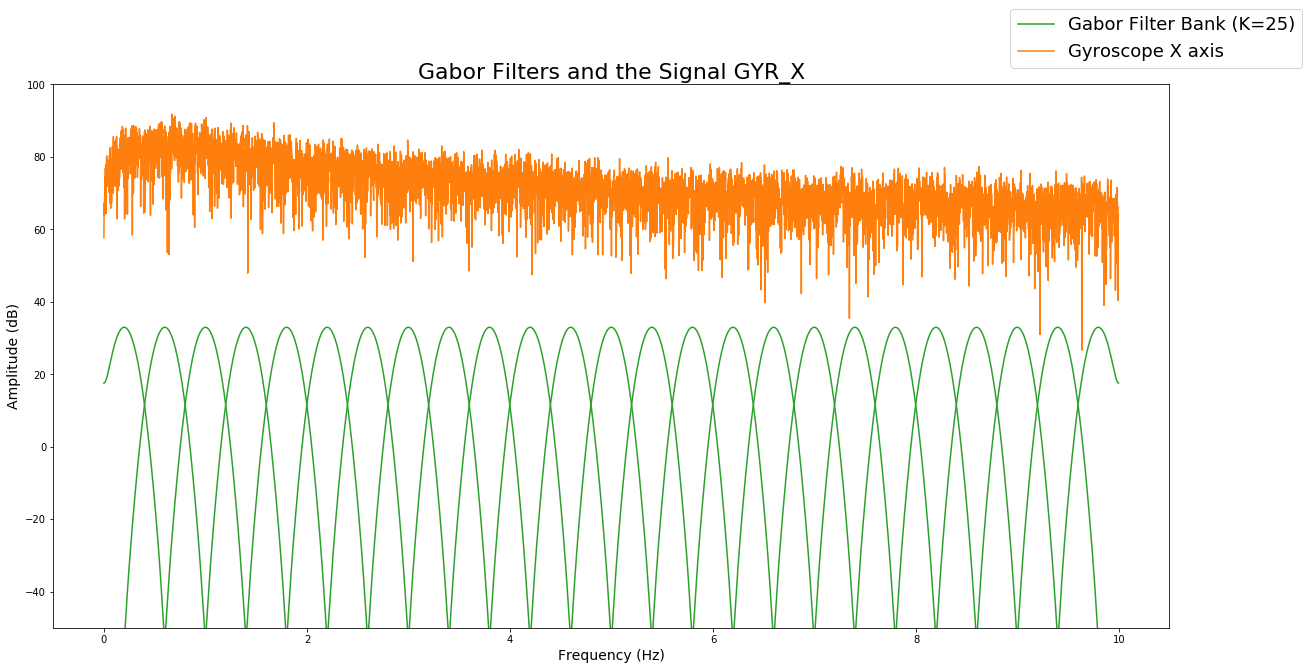

In [116]:
fs1 = 20
fs2 = 5
K = 25
X = np.fft.fft(gyrx)
X = X[:len(X)//2]
fig= plt.figure(figsize=(20,10))
gabor, gabor_spectrum = gabor_bank(gyrx, K, fs1)
f = np.linspace(0, len(X)/600, len(X))
axes = plt.gca()
axes.set_ylim([-50,100])
plt.plot(f, 20*np.log10((gabor_spectrum[0])), color='C2',label="Gabor Filter Bank (K=25)")
for i in range(1,25):
    plt.plot(f, 20*np.log10((gabor_spectrum[i])), color='C2')
plt.plot(f,20*np.log10(np.abs(X)),label = "Gyroscope X axis",color='C1')
plt.title("Gabor Filters and the Signal GYR_X", fontsize=22)
plt.xlabel("Frequency (Hz)",fontsize=14)
plt.ylabel("Amplitude (dB)",fontsize=14)
fig.legend(fontsize=18)
plt.show()

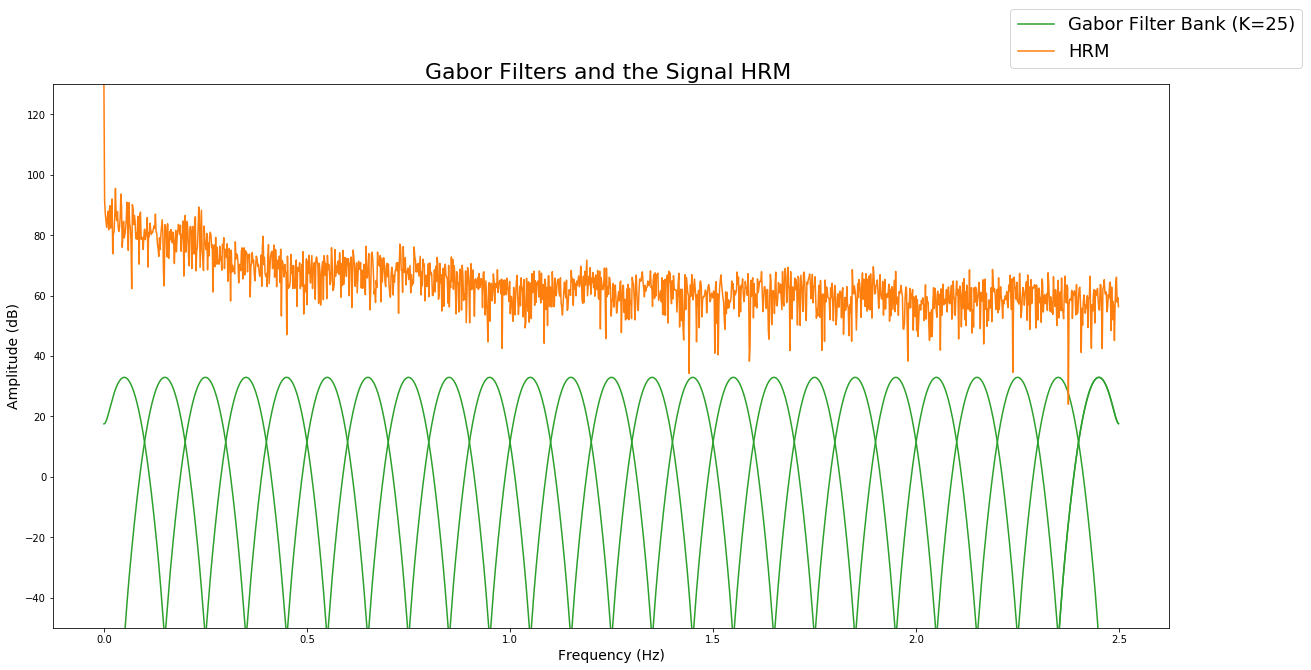

In [119]:
fs1 = 20
fs2 = 5
K = 25
X = np.fft.fft(hrm)
X = X[:len(X)//2]
fig= plt.figure(figsize=(20,10))
gabor, gabor_spectrum = gabor_bank(hrm, K, fs2)
f = np.linspace(0, len(X)/600, len(X))
axes = plt.gca()
axes.set_ylim([-50,130])
plt.plot(f, 20*np.log10((gabor_spectrum[i])), color='C2',label="Gabor Filter Bank (K=25)")
for i in range(25):
    plt.plot(f, 20*np.log10((gabor_spectrum[i])), color='C2')
plt.plot(f,20*np.log10(np.abs(X)),color='C1',label ="HRM")
plt.title("Gabor Filters and the Signal HRM ", fontsize=22)
plt.xlabel("Frequency (Hz)",fontsize=14)
plt.ylabel("Amplitude (dB)",fontsize=14)
fig.legend(fontsize=18)
plt.show()

Task 2.4

In [121]:
#We calculate the impusle funtion f[n] = hbin[n-1]

def binomial(signal):
    d2 = sp.signal.unit_impulse(len(signal),2)
    d1 = sp.signal.unit_impulse(len(signal),1)
    d0 = sp.signal.unit_impulse(len(signal),0)
    f = 0.25*d2+0.5*d1+0.25*d0
    h = np.copy(f)
    h[-1] = 0
    h[:-1] = f[1:]
    sign = sp.signal.lfilter(h,1,signal)
    return sign

Task 2.5

In [122]:
def win1(signal,fs):
    twin = 20
    tshift = 5
    sam_shift = fs*tshift
    samples = fs*twin
    ham = np.hamming(samples)
    k=0
    sign = signal[:]
    diff = 12300-len(signal)
    zeros = np.zeros(diff)
    sign = np.concatenate((sign,zeros),axis=None)
    ham_sign = np.zeros(samples)
    for i in range(0,11900,sam_shift):
        if(k==0):
            ham_sign = sign[i:i+samples]*ham
            k+=1
            continue
        k+=1
        sign2 = sign[i:i+samples]*ham
        ham_sign = np.vstack((ham_sign,sign2))
    return ham_sign
        
def win2(signal,fs):
    twin = 20
    tshift = 5
    sam_shift = fs*tshift
    samples = fs*twin
    ham = np.hamming(samples)
    k=0
    sign = signal[:]
    diff = 3075-len(signal)
    zeros = np.zeros(diff)
    sign = np.concatenate((sign,zeros),axis=None)
    ham_sign = np.zeros(samples)
    for i in range(0,2975,sam_shift):
        if(k==0):
            ham_sign = sign[i:i+samples]*ham
            k+=1
            continue
        k+=1
        sign2 = sign[i:i+samples]*ham
        ham_sign = np.vstack((ham_sign,sign2))
    return ham_sign
        
                

Task 2.6

In [123]:
def mte(signal,fs, K):
    if fs == 20:
        ham_signal = win1(signal,fs)
    if fs == 5:
        ham_signal = win2(signal,fs)
    gabor_list_signal = []
    for i in range(ham_signal.shape[0]):
        A,_ = gabor_bank(ham_signal[i],25,fs)
        gabor_list_signal.append(A)   
    
    bin_teo_list_signal = np.copy(gabor_list_signal)
    for i in range(119):
        for j in range(K):
            bin_teo_list_signal[i][j] = binomial(binomial(teo(gabor_list_signal[i][j])))
    print(bin_teo_list_signal[0].shape)
    Mean = []
    mean = []
    for i in range(119):
        for j in range(K):
            y = bin_teo_list_accx[i][j]
            m = sum(y[y>0])/len(y[y>0])
            mean.append(m)
        Mean.append(mean)
        mean = []
    print(len(Mean))
    maxTF = []
    for i in range (119):
        a = Mean[i]
        m = max(Mean[i]) 
        maximum = [l for l, j in enumerate(a) if j == m]
        maxTF.append((m,maximum))

    mte_signal = np.zeros(119)
    for i in range(119):
        mte_signal[i] = maxTF[i][0]
    return mte_signal
#For accx
#g_accx = array
ham_accx = win1(accx,fs1)
#For gyrx
ham_gyrx = win1(gyrx,fs1)
#For hrm
ham_hrm = win2(hrm,fs2)

print(ham_hrm.shape)

(119, 100)


In [124]:
gabor_list_accx = []
for i in range(ham_accx.shape[0]):
    A,_ = gabor_bank(ham_accx[i],25,fs1)
    gabor_list_accx.append(A)   
print(gabor_list_accx[0].shape)


(25, 400)


In [125]:
gabor_list_gyrx = []
for i in range(ham_gyrx.shape[0]):
    B,_ = gabor_bank(ham_gyrx[i],25,fs1)
    gabor_list_gyrx.append(B)
print(gabor_list_gyrx[0].shape)

(25, 400)


In [126]:
gabor_list_hrm = []
for i in range(ham_hrm.shape[0]):
    C,_ = gabor_bank(ham_hrm[i],25,fs2)
    gabor_list_hrm.append(C)     
print(gabor_list_hrm[0].shape)

(25, 100)


Task 2.7

In [127]:
#a,b)Implementing the Teager Energy Operator
bin_teo_list_accx = np.copy(gabor_list_accx)
bin_teo_list_gyrx = np.copy(gabor_list_gyrx)
bin_teo_list_hrm = np.copy(gabor_list_hrm)
for i in range(119):
    for j in range(K):
        bin_teo_list_accx[i][j] = binomial(binomial(teo(gabor_list_accx[i][j])))
        bin_teo_list_gyrx[i][j] = binomial(binomial(teo(gabor_list_gyrx[i][j])))
        bin_teo_list_hrm[i][j] = binomial(binomial(teo(gabor_list_hrm[i][j])))
print(bin_teo_list_accx[0].shape)
print(bin_teo_list_gyrx[0].shape)
print(bin_teo_list_hrm[0].shape)

(25, 400)
(25, 400)
(25, 100)


In [128]:
#c)
Mean = [[],[],[]]
mean = [[],[],[]]
for i in range(119):
    for j in range(K):
        y = bin_teo_list_accx[i][j]
        m = sum(y[y>0])/len(y[y>0])
        mean[0].append(m)
        y = bin_teo_list_gyrx[i][j]
        m = sum(y[y>0])/len(y[y>0])
        mean[1].append(m)
        y = bin_teo_list_hrm[i][j]
        m = sum(y[y>0])/len(y[y>0])
        mean[2].append(m)
    Mean[0].append(mean[0])
    Mean[1].append(mean[1])
    Mean[2].append(mean[2])
    mean = [[],[],[]]
print(len(Mean[0][0]))

25


In [129]:
#d)
print(type(Mean[0][0]))
maxTF = [[],[],[]]#list with (max mean value,number of filter)
for i in range (119):
    a = Mean[0][i]
    m = max(Mean[0][i]) #accx
    maximum = [l for l, j in enumerate(a) if j == m]
    maxTF[0].append((m,maximum))
    a = Mean[1][i]
    m = max(Mean[1][i]) #gyrx
    maximum = [l for l, j in enumerate(a) if j == m]
    maxTF[1].append((m,maximum))
    a = Mean[2][i]
    m = max(Mean[2][i]) #hmr
    maximum = [l for l, j in enumerate(a) if j == m]
    maxTF[2].append((m,maximum))

a1 = fs1/2/K
a2 = fs2/2/K
fc_min1 = a1/2
fc_max1 = (fs1-a1)/2
fc_min2 = a2/2
fc_max2 = (fs2-a2)/2
Fc1 = list(np.linspace(fc_min1,fc_max1,25))
Fc2 = list(np.linspace(fc_min2,fc_max2,25))
maxtf = [[],[],[]]#list with (max mean value, corresponding frequency)
for i in range(119): 
    maxtf[0].append((maxTF[0][i][0],Fc1[maxTF[0][i][1][0]])) #accx
    maxtf[1].append((maxTF[1][i][0],Fc1[maxTF[1][i][1][0]])) #accx
    maxtf[2].append((maxTF[2][i][0],Fc2[maxTF[2][i][1][0]])) #accx

print(maxtf[0][112][1])

<class 'list'>
2.2000000000000006


2998


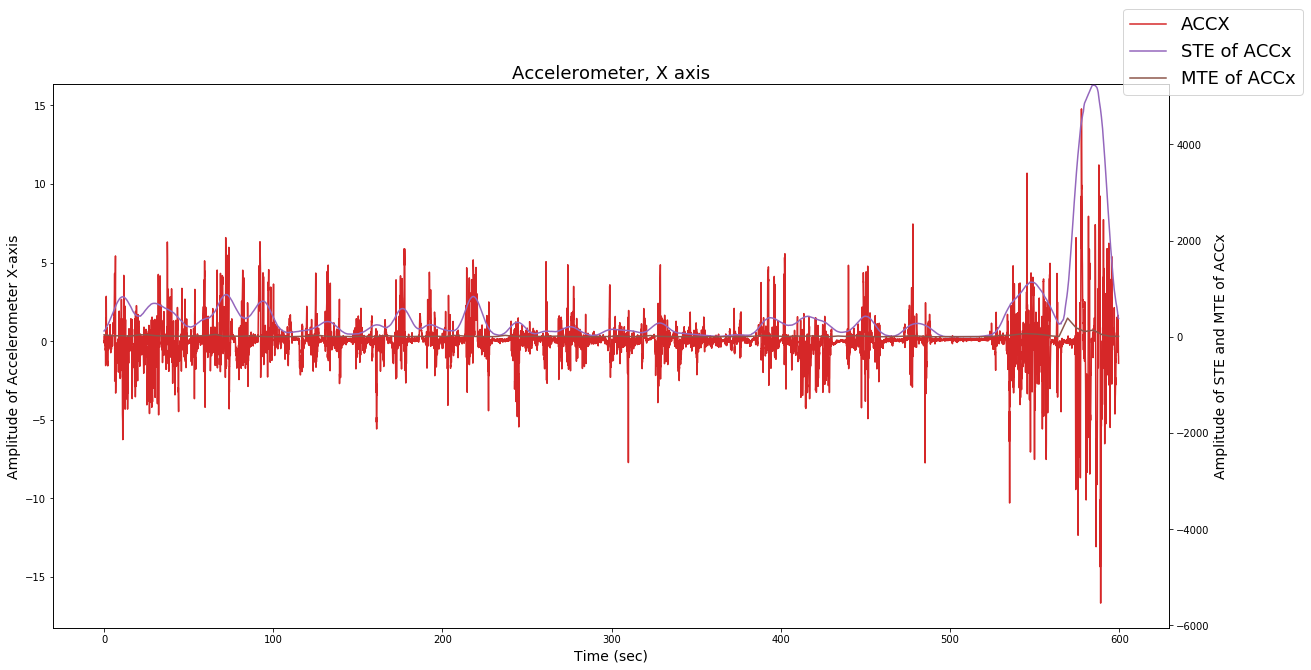

In [208]:
#d)
y1 = len(accx)/119
y2 = len(hrm)/119

mte_accx = np.zeros(119)
mte_gyrx = np.zeros(119)
mte_hrm = np.zeros(119)
for i in range(119):
    mte_accx[i] = maxtf[0][i][0]
    mte_gyrx[i] = maxtf[1][i][0]
    mte_hrm[i] = maxtf[2][i][0]
mte_accx = np.interp(np.arange(0,len(mte_accx),1/y1),np.arange(0,len(mte_accx)),mte_accx)
mte_gyrx = np.interp(np.arange(0,len(mte_gyrx),1/y1),np.arange(0,len(mte_gyrx)),mte_gyrx)
mte_hrm = np.interp(np.arange(0,len(mte_hrm),1/y2),np.arange(0,len(mte_hrm)),mte_hrm)

print(len(mte_hrm))





#Plot  for Acc_x
ste_a, samples_a = ste(accx,20, fs1)
t=np.linspace(0,len(ste_a)/fs1,len(ste_a))
fig=plt.figure(figsize = (20,10))
ax1 =fig.add_subplot(111)
ax1.plot(n_acc/fs1,accx,color='C3',label = 'ACCX')
ax2=ax1.twinx()
ax2.plot(t,ste_a,color='C4',label = 'STE of ACCx')
ax2.plot(t,mte_accx,color='C5',label = 'MTE of ACCx')
ax2.set_ylim(-max(ste_a)-800,max(ste_a))
ax2.set_ylabel(r"Amplitude of STE and MTE of ACCx",fontsize=14)
ax1.set_ylabel(r"Amplitude of Accelerometer X-axis",fontsize=14)
plt.title("Accelerometer, X axis", fontsize=18)
fig.legend(fontsize=18)
ax1.set_xlabel('Time (sec)',fontsize=14)
plt.show()


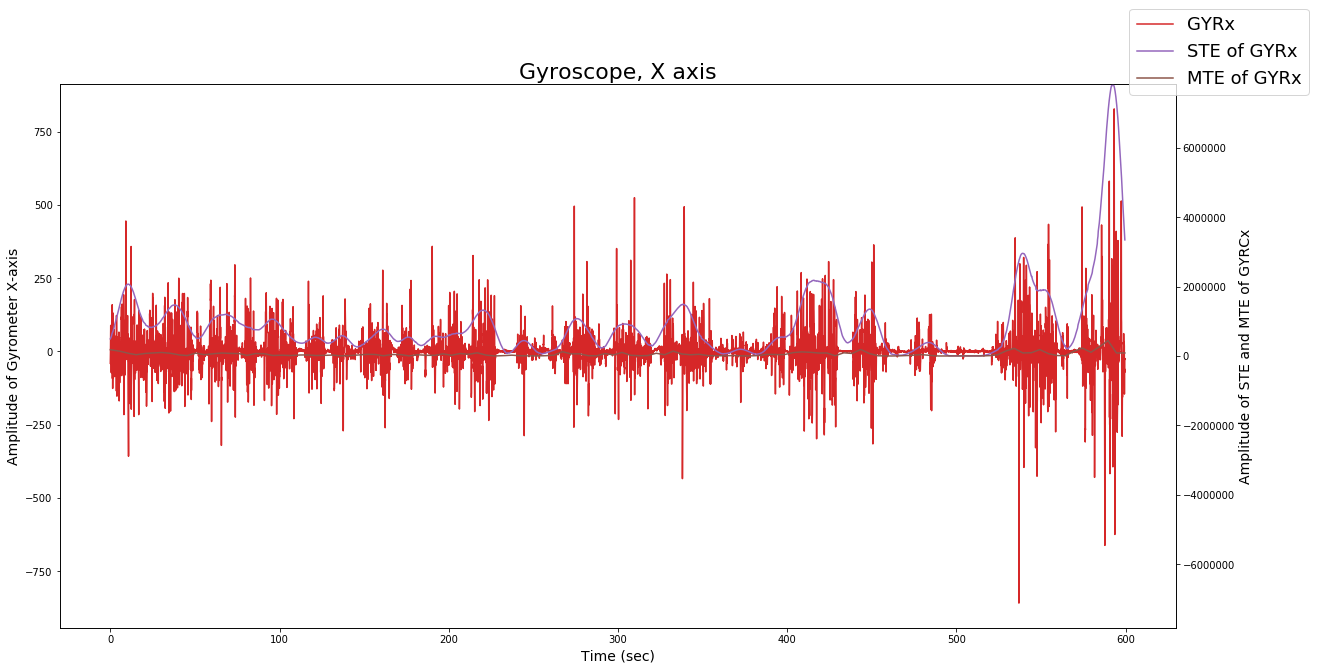

7830539.246246752


In [209]:
ste_g,samples_g = ste(gyrx,20, fs1)
t=np.linspace(0,len(ste_g)/fs1,len(ste_g))
fig=plt.figure(figsize = (20,10))
ax1 =fig.add_subplot(111)
ax1.plot(n_gyr/fs1,gyrx,color='C3', label ='GYRx')
ax1.set_ylabel(r"Amplitude of Gyrometer X-axis",fontsize=14)
ax2=ax1.twinx()
ax2.plot(t,ste_g,color='C4',label = 'STE of GYRx')
ax2.plot(t,mte_gyrx,color='C5', label = 'MTE of GYRx')
ax2.set_ylim(-max(ste_g),max(ste_g))
ax2.set_ylabel(r"Amplitude of STE and MTE of GYRCx",fontsize=14)
plt.title("Gyroscope, X axis", fontsize=22)
fig.legend(fontsize=18)
ax1.set_xlabel('Time (sec)',fontsize=14)
plt.show()
print(max(ste_g))

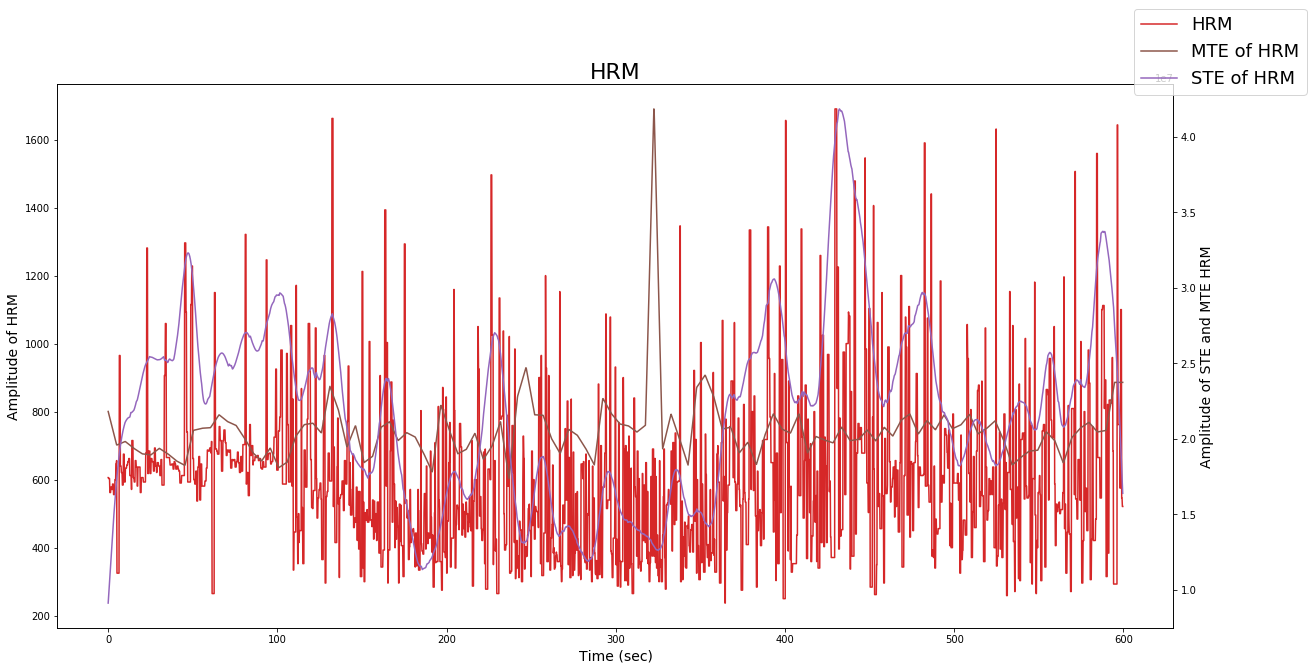

In [210]:
ste_h,samples_h = ste(hrm,20, fs2)
t1=np.linspace(0,len(ste_h)/fs2,len(ste_h))
fig=plt.figure(figsize = (20,10))
ax1 =fig.add_subplot(111)
ax1.plot(n_hrm/fs2,hrm,color='C3',label='HRM')
ax2=ax1.twinx()
#ax3 = ax2.twinx()
ax2.plot(t1,ste_h,color='C4',label = 'STE of HRM')
ax1.plot(t1,mte_hrm*(max(hrm)/max(mte_hrm)),color='C5', label = 'MTE of HRM')
#ax1.set_ylim(-max(ste_h),max(ste_h))
#ax1.set_ylim(-max(mte_hrm),max(mte_hrm))
ax2.set_ylabel(r"Amplitude of STE and MTE HRM",fontsize=14)
ax1.set_ylabel(r"Amplitude of HRM",fontsize=14)
plt.title("HRM", fontsize=22)
fig.legend(fontsize=18)
ax1.set_xlabel('Time (sec)',fontsize=14)
plt.show()

Part 3

Task 3.1

In [133]:
files = os.listdir('/home/mpektkd/hmmy_6th/DSP/DSP20_LAB2')
files = sorted(files)
signals = files[1:]

print(signals)

def characteristics_2(signal):
    stat = []
    stat.append(np.max(signal))
    stat.append(np.min(signal))
    stat.append(np.mean(signal))
    stat.append(np.std(signal))
    return stat
elements = []
ste_ = []
mte_ = []
All = []
mean1 = []
mean2 = []
mean3 = []
a = []
b = []
for file in signals:
    with np.load('./data/'+file) as data:
        acc = data['acc']
        gyr = data['gyr']
        hrm = data['hrm']
    for i in range(3):
        acc_i = acc[:,i]
        gyr_i = gyr[:,i]    
        ste_a,_ = stnrg(acc_i,20,20)
        ste_a = characteristics_2(ste_a)
        mte_a = mte(acc_i,20,25)
        mte_a = characteristics_2(mte_a)
        ste_g,_ = stnrg(gyr_i,20,20)
        ste_g = characteristics_2(ste_g)
        mte_g = mte(gyr_i,20,25)
        mte_g = characteristics_2(mte_g)
        a = np.concatenate((ste_a,mte_a),axis=None)
        mean1 = np.concatenate((mean1,a))
        print(len(a))
        b = np.concatenate((ste_g,mte_g),axis=None)
        mean2 = np.concatenate((mean2,b),axis=None)
        a = []
        b = []
    ste_h,_ = stnrg(hrm,20,5)
    ste_h = characteristics_2(ste_h)
    mte_h = mte(hrm,5,25)
    mte_h = characteristics_2(mte_h)
    a = np.concatenate((ste_h,mte_h))
    mean3 = np.concatenate((mean3,a),axis=None)
    mean1 = np.concatenate((mean1,mean2),axis=None)
    mean1 = np.concatenate((mean1,mean3),axis=None)
    print(len(mean1))
    All.append(mean1)
    a = []
    mean1 = []
    mean2 = []
    mean3 = []

['sleep_00.npz', 'sleep_01.npz', 'sleep_02.npz', 'sleep_03.npz', 'sleep_04.npz', 'sleep_05.npz', 'sleep_06.npz', 'sleep_07.npz', 'sleep_08.npz', 'sleep_09.npz', 'sleep_10.npz', 'sleep_11.npz', 'sleep_12.npz', 'sleep_13.npz', 'sleep_14.npz', 'sleep_15.npz', 'sleep_16.npz', 'sleep_17.npz', 'sleep_18.npz', 'sleep_19.npz', 'step_00.npz', 'step_01.npz', 'step_02.npz', 'step_03.npz', 'step_04.npz', 'step_05.npz', 'step_06.npz', 'step_07.npz', 'step_08.npz', 'step_09.npz', 'step_10.npz', 'step_11.npz', 'step_12.npz', 'step_13.npz', 'step_14.npz', 'step_15.npz', 'step_16.npz', 'step_17.npz', 'step_18.npz', 'step_19.npz']
(25, 400)
119
(25, 400)
119
8
(25, 400)
119
(25, 400)
119
8
(25, 400)
119
(25, 400)
119
8
(25, 100)
119
56
(25, 400)
119
(25, 400)
119
8
(25, 400)
119
(25, 400)
119
8
(25, 400)
119
(25, 400)
119
8
(25, 100)
119
56
(25, 400)
119
(25, 400)
119
8
(25, 400)
119
(25, 400)
119
8
(25, 400)
119
(25, 400)
119
8
(25, 100)
119
56
(25, 400)
119
(25, 400)
119
8
(25, 400)
119
(25, 400)
119


In [211]:
print(len(All))

40


Task 3.2

In [212]:
X = np.copy(All)
X = X - np.mean(X,axis=0)
U , S, Vh = np.linalg.svd(X,full_matrices = True)
print(U.shape)
print(S.shape)
print(Vh.shape)


(40, 40)
(40,)
(56, 56)


(40, 56)
[0, 1]


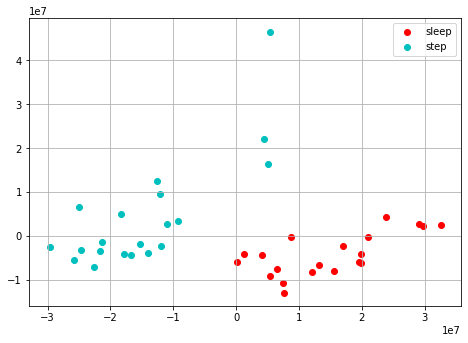

In [224]:
G = np.zeros((40,56))
V = Vh.T
for i in range(56):
    y = X.dot(V[:,i])
    G[:,i] = y
print(G.shape)
lk = [(i**2)/40 for i in S]
lk = [i/sum(lk) for i in lk]
enum = list(enumerate(lk))
lk = sorted(lk)
res = [i for i,j in enum if j == lk[38] or j == lk[39]]
print(res)
Y = np.zeros((40,2))
y1 = Y[:,0] = G[:,0]  #from G we choose the firt two columns with greater lk
y2 = Y[:,1] = G[:,1]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.grid()
ax.scatter(y1[:20], y2[:20] ,color='r')
ax.scatter(y1[20:40], y2[20:40], color='c')
plt.legend(['sleep','step'])
plt.show()

Task 3.3

1000
23
17


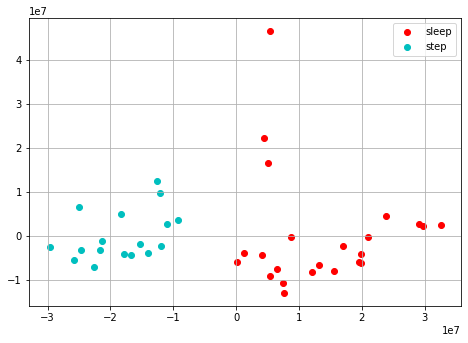

In [226]:
#For Kmeans
def Kmeans(y1,y2):
#1 we choose the centres randomly
    y11 = random.choice(y1)
    y12 = random.choice(y2)
    y21 = random.choice(y1)
    y22 = random.choice(y2)
    #y11 = y1[0]
    #y12 = y2[0] #sleep
    
    #y21 = y1[20]
    #y22 = y2[20] #step
    cluster1 = []
    cluster2 = []
    dn1 = []
    dn2 = []
    dpr1= []
    dpr2= []

#4 Threshold
    Th = 0.001
    counter = 0
    while(True):
        counter = counter+1
#2 computation of the distance
        dpr1 = dn1[:]
        dpr2 = dn2[:]
        for i in range(40):
            x1 = y1[i]
            x2 = y2[i]
            dist1 = np.sqrt((x1-y11)**2+(x2-y12)**2)
            #print("1",dist1)
            dist2 = np.sqrt((x1-y21)**2+(x2-y22)**2)
            #print("2",dist2)
            if dist1 < dist2:
                dn1.append(dist1)
                cluster1.append((x1,x2))
            if dist2 < dist1:
                dn2.append(dist2)
                cluster2.append((x1,x2))
            if dist1 == dist2:
                dn1.append(dist1)
                dn2.append(dist2)
                cluster1.append((x1,x2))
                cluster2.append((x1,x2))
#3 refesh of the centroids
        a = [i for i,j in cluster1]
        b = [j for i,j in cluster1]
        if len(a) != 0:
            y11 = sum(a)/len(a)
        if len(b) != 0:
            y12 = sum(b)/len(b)
        a = [i for i,j in cluster2]
        b = [j for i,j in cluster2]
        if len(a) != 0:
            y21 = sum(a)/len(a)
        if len(b) != 0:
            y22 = sum(b)/len(b)
        if dpr1 != [] and dpr2 != []:
            if((abs((sum(dpr1)-sum(dn1)))/sum(dn1))<=Th and (abs((sum(dpr2)-sum(dn2)))/sum(dn2)<=Th)):
                break
        cluster1 = []
        cluster2 = []
    print(counter)
    print(len(cluster1))
    print(len(cluster2))
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    plt.grid()
    a = [i for i,j in cluster1]
    b = [j for i,j in cluster1]
    ax.scatter(a,b ,color='r')
    a = [i for i,j in cluster2]
    b = [j for i,j in cluster2]
    ax.scatter(a,b, color='c')
    plt.legend(['sleep','step'])
    plt.show()
    return len(cluster1),len(cluster2)

s1, s2 = Kmeans(y1,y2)

Task 3.4

In [228]:
from sklearn.metrics.cluster import adjusted_rand_score

cl1 = [1 for i in range(s1)]
cl2 = [0 for i in range(s2)]

L = np.concatenate((cl1,cl2))
W = np.concatenate(([0 for i in range(20)],[1 for i in range(20)]))
r = adjusted_rand_score(L,W)
print(r)

0.7153659017686895


Part 4

Task 4.1

In [11]:
with np.load('./data/sleep_01.npz') as data:
    acc = data['acc']
    gyr = data['gyr']
    hrm = data['hrm']

In [12]:
acc_y = acc[:,1]
gyr_y = gyr[:,1]

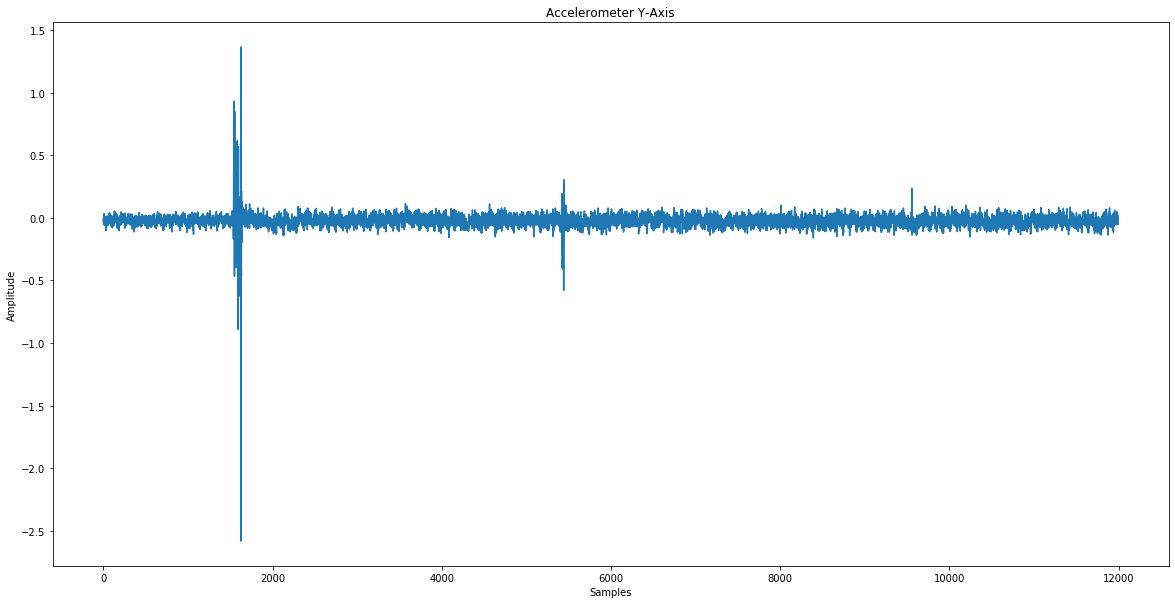

In [109]:
fig= plt.figure(figsize=(20,10))
t = np.linspace(0,len(acc_y),len(acc_y))
plt.plot(t,acc_y)
plt.ylabel("Amplitude")
plt.xlabel("Samples")
plt.title("Accelerometer Y-Axis")
plt.show()

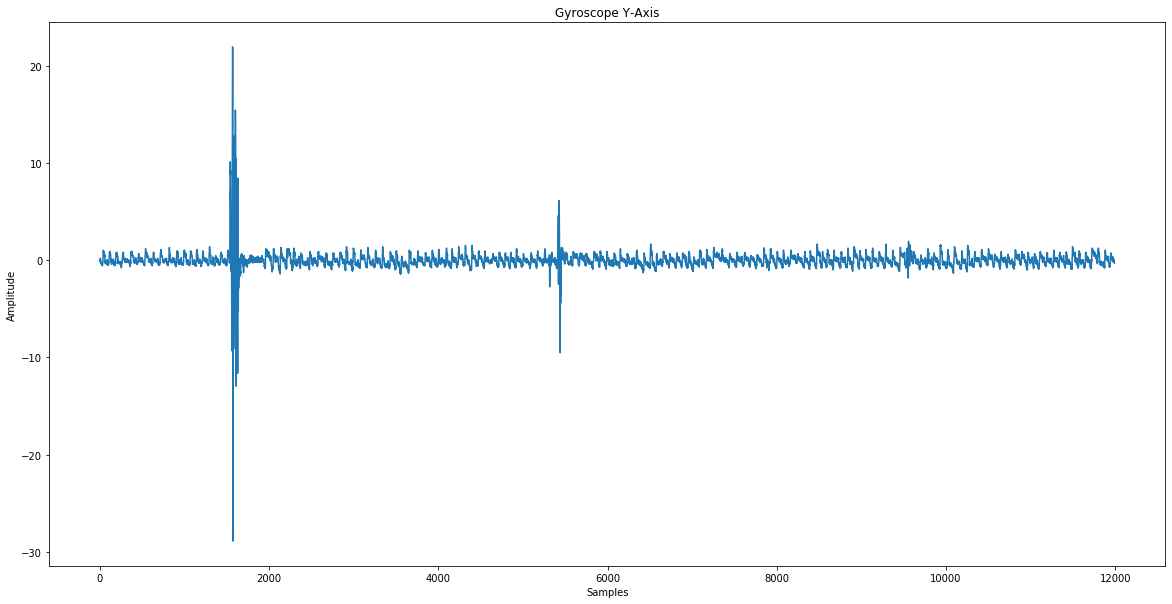

In [111]:
fig= plt.figure(figsize=(20,10))
t = np.linspace(0,len(gyr_y),len(gyr_y))
plt.plot(t,gyr_y)
plt.ylabel("Amplitude")
plt.xlabel("Samples")
plt.title("Gyroscope Y-Axis")
plt.show()

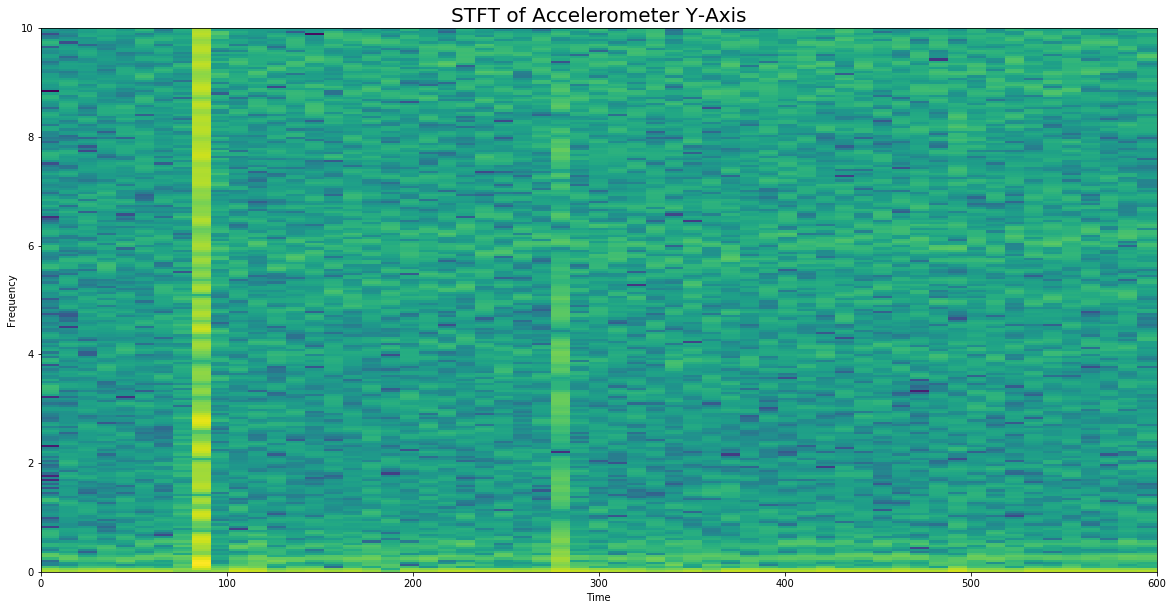

In [258]:
ACC_y = librosa.core.stft(acc_y, n_fft=512, hop_length = 200 , win_length = 400)
f = np.linspace(0,fs1/2,ACC_y.shape[0])
t = np.linspace(0,600,ACC_y.shape[1]) 
fig= plt.figure(figsize=(20,10))
plt.pcolormesh(t,f,np.log10(abs(ACC_y)))
plt.title("STFT of Accelerometer Y-Axis", fontsize=20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

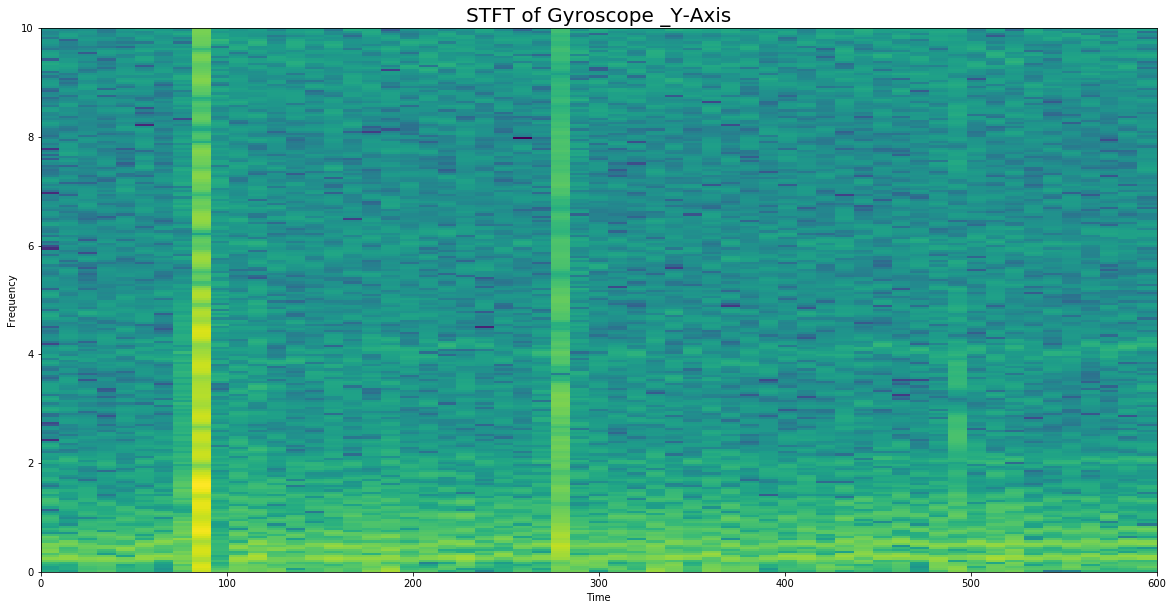

In [39]:
GYR_y = librosa.core.stft(gyr_y, n_fft=512, hop_length = 200 , win_length = 400)
f = np.linspace(0,fs1/2,GYR_y.shape[0])
t = np.linspace(0,600,GYR_y.shape[1]) 
fig= plt.figure(figsize=(20,10))
plt.pcolormesh(t,f,np.log10(abs(GYR_y)))
plt.title("STFT of Gyroscope _Y-Axis", fontsize=20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

Task 4.2

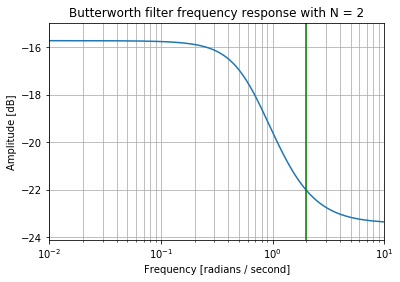

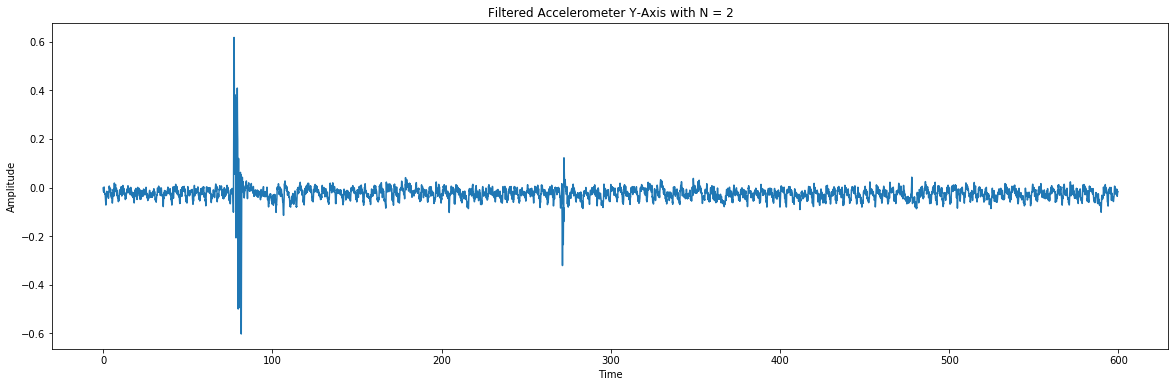

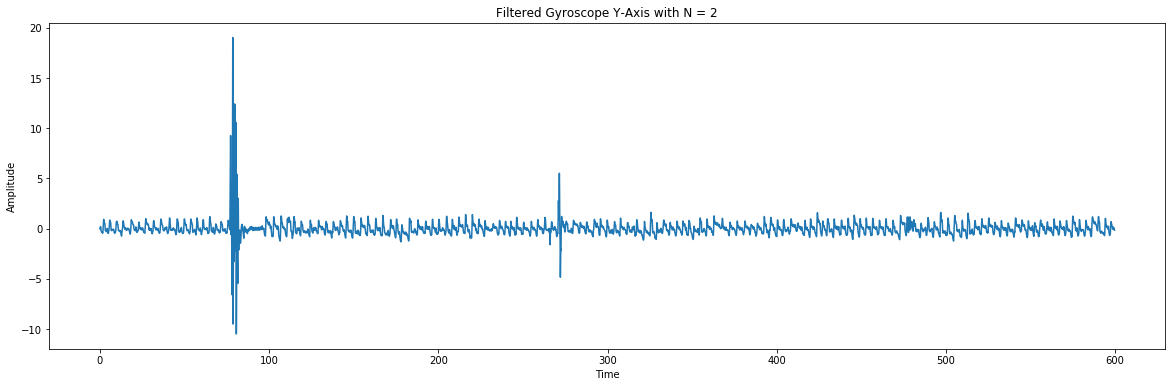

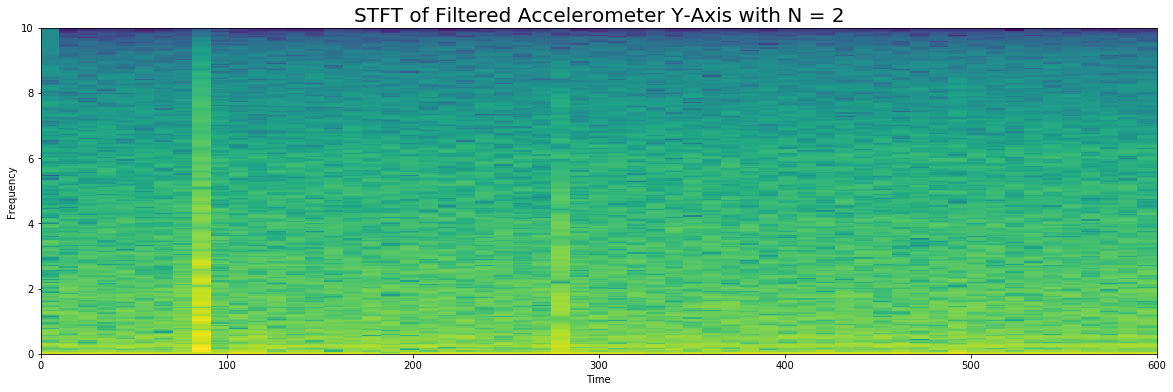

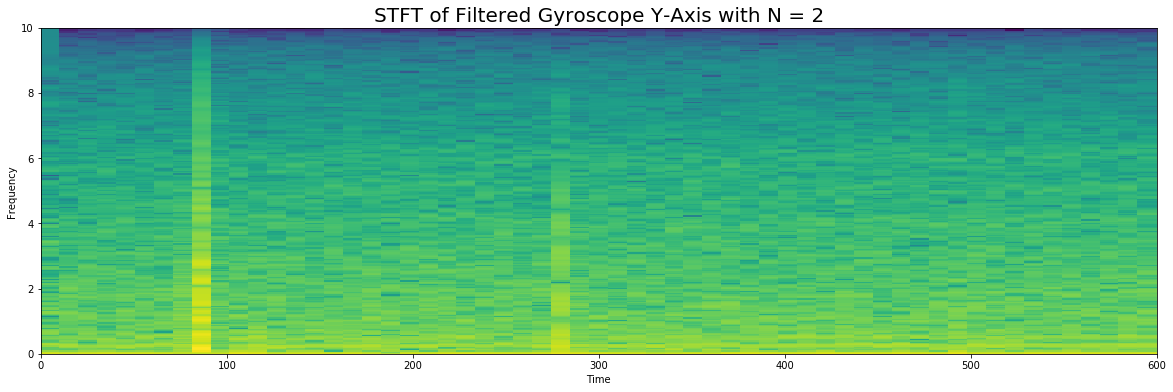

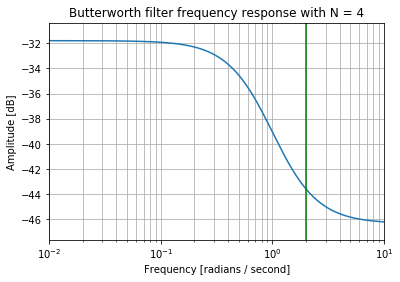

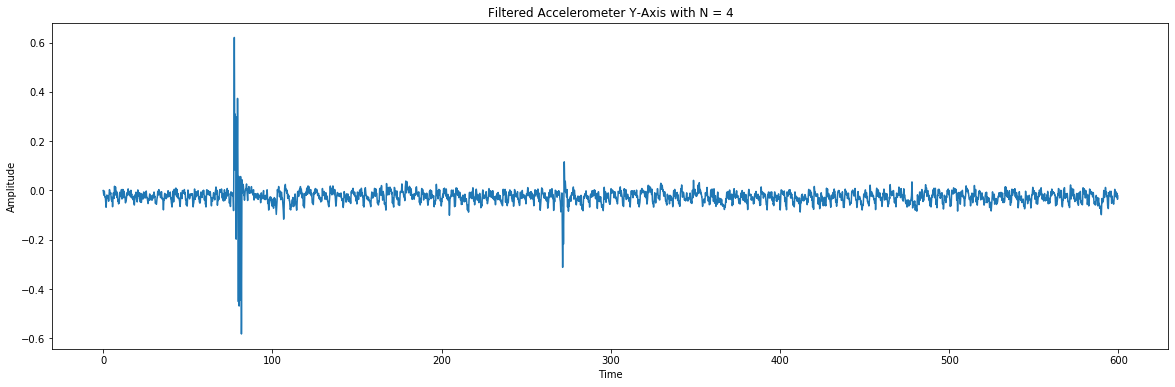

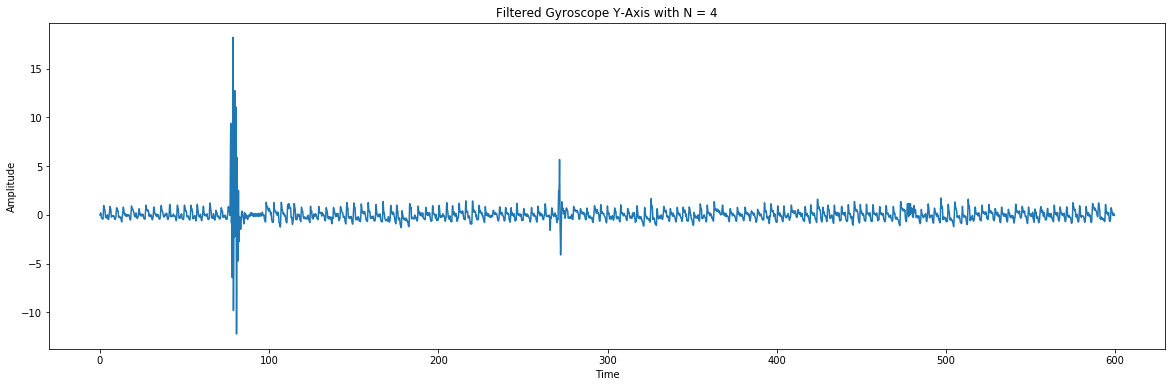

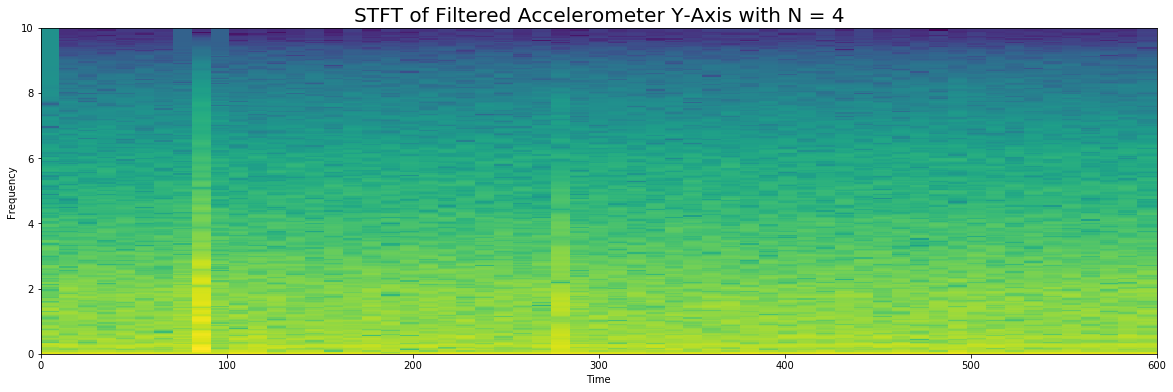

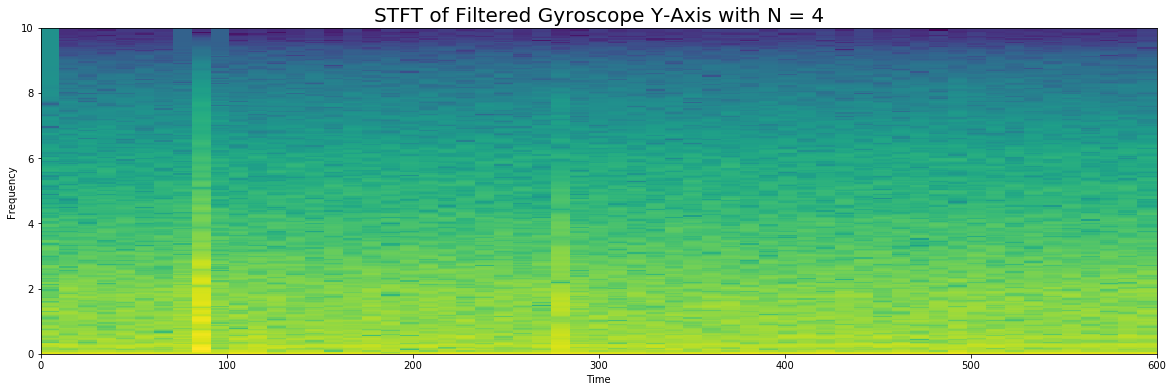

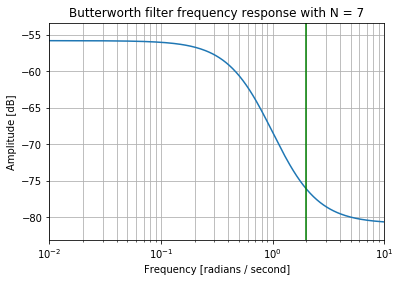

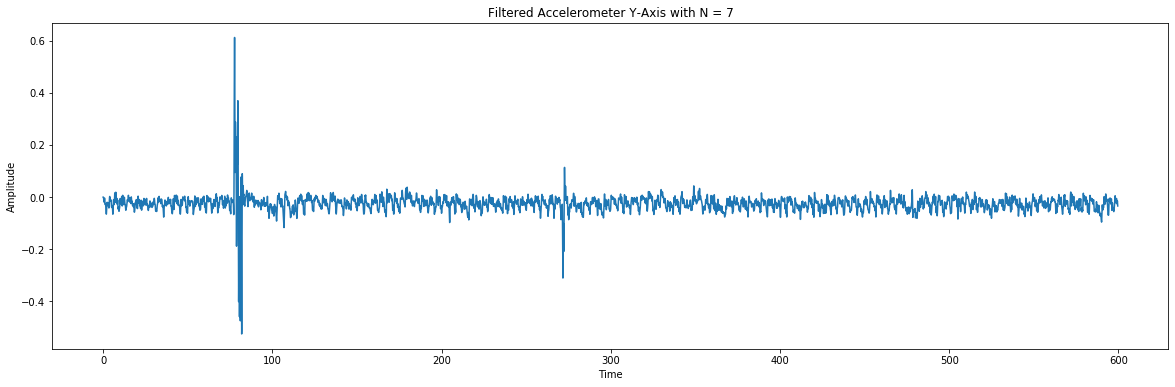

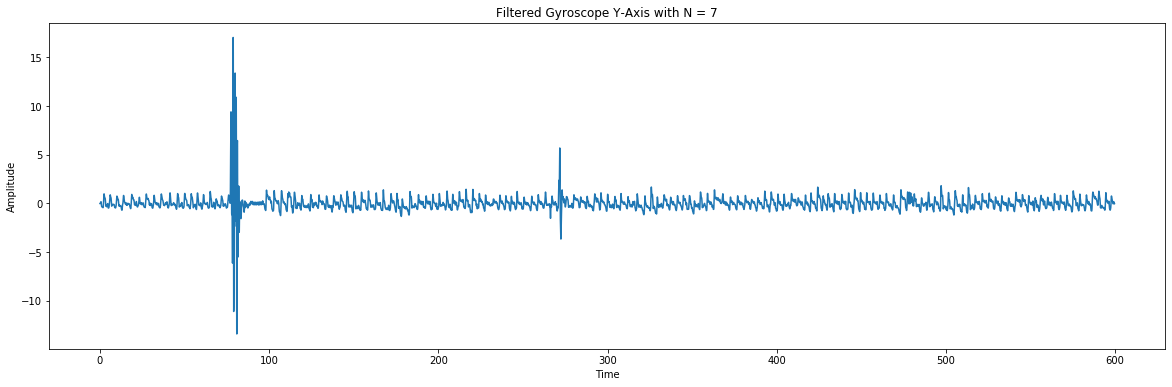

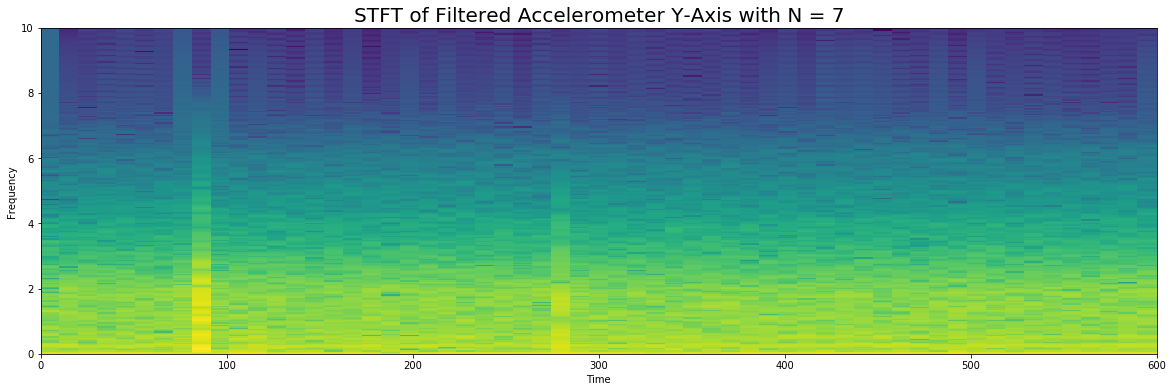

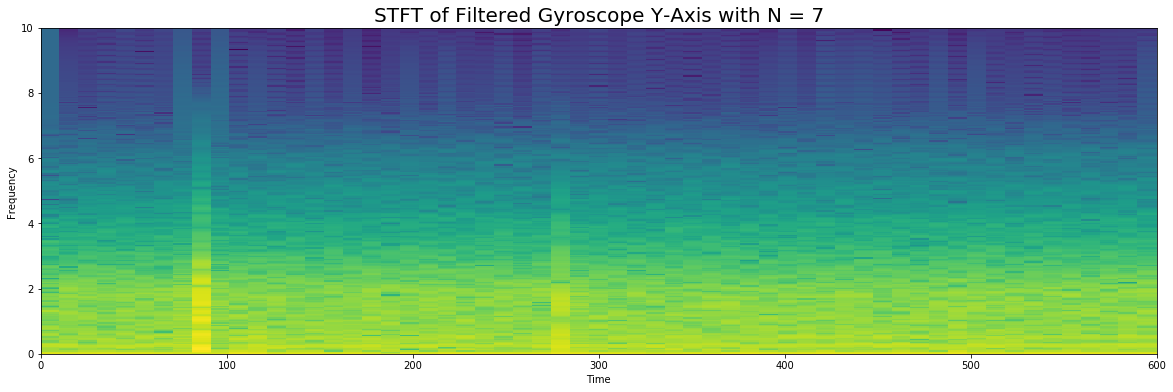

In [235]:
def butter(signal,N,name):
    global fs1
    b,a = sp.signal.butter(N, Wn = 2, fs = fs1)
    w,h = sp.signal.freqs(b,a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.title('Butterworth filter frequency response with N = '+str(N))
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axvline(2, color='green') # cutoff frequency
    plt.show()

    
    signal_bf = sp.signal.lfilter(b,a, signal)
    fig= plt.figure(figsize=(20,6))
    t = np.linspace(0,len(signal_bf)/fs1,len(signal_bf))
    plt.plot(t,signal_bf)
    plt.title("Filtered "+name+" with N = "+str(N))
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.show()
    
    sign_y_bf = librosa.core.stft(acc_y_bf, n_fft=512, hop_length = 200 , win_length = 400)
    f = np.linspace(0,fs1/2,sign_y_bf.shape[0])
    t = np.linspace(0,600,sign_y_bf.shape[1]) 
    fig= plt.figure(figsize=(20,6))
    plt.pcolormesh(t,f,np.log10(abs(sign_y_bf)))
    plt.title("STFT of Filtered "+name+" with N = "+str(N), fontsize=20)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()
    
    return
    
N = [2,4,7]
for i in range(3):
    b,a = sp.signal.butter(N[i], Wn = 2, fs = fs1)
    w,h = sp.signal.freqs(b,a)

    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.title('Butterworth filter frequency response with N = '+str(N[i]))
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axvline(2, color='green') # cutoff frequency
    plt.show()
    
    acc_y_bf = sp.signal.lfilter(b,a, acc_y)
    gyr_y_bf = sp.signal.lfilter(b,a, gyr_y)
    fig= plt.figure(figsize=(20,6))
    t = np.linspace(0,len(acc_y_bf)/fs1,len(acc_y_bf))
    plt.plot(t,acc_y_bf)
    plt.title("Filtered Accelerometer Y-Axis with N = "+str(N[i]))
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.show()

    fig= plt.figure(figsize=(20,6))
    t = np.linspace(0,len(gyr_y_bf)/fs1,len(gyr_y_bf))
    plt.plot(t,gyr_y_bf)
    plt.title("Filtered Gyroscope Y-Axis with N = "+str(N[i]))
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.show()
    ACC_y_bf = librosa.core.stft(acc_y_bf, n_fft=512, hop_length = 200 , win_length = 400)
    f = np.linspace(0,fs1/2,ACC_y_bf.shape[0])
    t = np.linspace(0,600,ACC_y_bf.shape[1]) 
    fig= plt.figure(figsize=(20,6))
    plt.pcolormesh(t,f,np.log10(abs(ACC_y_bf)))
    plt.title("STFT of Filtered Accelerometer Y-Axis with N = "+str(N[i]), fontsize=20)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

    GYR_y_bf = librosa.core.stft(acc_y_bf, n_fft=512, hop_length = 200 , win_length = 400)
    f = np.linspace(0,fs1/2,GYR_y_bf.shape[0])
    t = np.linspace(0,600,GYR_y_bf.shape[1]) 
    fig= plt.figure(figsize=(20,6))
    plt.pcolormesh(t,f,np.log10(abs(GYR_y_bf)))
    plt.title("STFT of Filtered Gyroscope Y-Axis with N = "+str(N[i]), fontsize=20)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

Task 4.3

In [259]:
def power(signal):
    a = abs(np.fft.fft(signal))**2
    P = (1/(len(signal)))*a
    return P    

In [260]:
acc_y_noise = acc_y[3600:4000] #from the plot at 4.1 it seems that the walker has stopped
gyr_y_noise = gyr_y[3600:4000]

In [261]:
def sub(signal1, signal2):
    Pd = np.zeros(len(signal1))
    for i in range(len(signal1)):
        if (signal1[i] > signal2[i]):
            Pd[i] = signal1[i] - signal2[i]
        else:
            Pd[i] = 0
    return Pd 

def spect(signal1, signal2):
    Hwien = np.zeros(len(signal1))
    for i in range (len(signal1)):
        Hwien[i] = signal1[i]/(signal1[i] + signal2[i])
    return Hwien

def mul(signal1, signal2):
    fltrd_spctr = np.zeros(len(signal1))
    for i in range (len(signal1)):
        fltrd_spctr[i] = signal1[i] * signal2[i]
    return fltrd_spctr  


In [315]:
def wiener(signal,noise):    #Implementation of Wiener Filter 
    Pd = np.zeros(400)
    Pn = Pwr_Spctr(noise)
    fltrd_signal = np.zeros(len(signal))
    for i in range (0,len(signal),400):
        if (len(signal[i:i+400]) < 400):
            sgn = signal[i:]
        else:
            sgn = signal[i:i+400]
        sgn_spctr = abs(np.fft.fft(sgn))
        Px = power(sgn)
        Pd = sub(Px, Pn)
        Hwien = spect(Pd, Pn)
        fltrd_spctr = mul(sgn_spctr, Hwien)
        fltrd_sgn = (np.fft.ifft(fltrd_spctr))
        fltrd_signal[i:i+400] = fltrd_sgn.real
    return fltrd_signal         

def wiener_all(signal,noise,name):
    Pd = np.zeros(400)
    Pn = power(noise)
    fltrd_signal = np.zeros(len(signal))
    for i in range (0,len(signal),400):
        if (len(signal[i:i+400]) < 400):
            sgn = signal[i:]
        else:
            sgn = signal[i:i+400]
        sgn_spctr = abs(np.fft.fft(sgn))
        Px = power(sgn)
        Pd = sub(Px, Pn)
        Hwien = spect(Pd, Pn)
        fltrd_spctr = mul(sgn_spctr, Hwien)
        fltrd_sgn = (np.fft.ifft(fltrd_spctr))
        fltrd_signal[i:i+400] = fltrd_sgn.real
        
        
    fig= plt.figure(figsize=(20,6))
    t = np.linspace(0,len(fltrd_signal),len(fltrd_signal))
    plt.plot(t,signal, label = "Initial Signal of "+name, color = "C3")
    plt.plot(t,fltrd_signal,label = "Filtered Signal of "+name, color = "C2")
    fig.legend(fontsize=18)
    plt.title("Real Part of the Filtered Signal and the Unfilterd Signal")
    plt.ylabel("Amplitude")
    plt.xlabel("Samples")
    plt.show()
    
    signal_wf = librosa.stft(fltrd_signal, n_fft=512, hop_length = 200 , win_length = 400) 
    f = np.linspace(0,fs1/2,signal_wf.shape[0])
    t = np.linspace(0,600,signal_wf.shape[1]) 
    fig= plt.figure(figsize=(20,6))
    plt.pcolormesh(t,f,abs(signal_wf))
    plt.title("STFT of Filtered "+name, fontsize=20)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

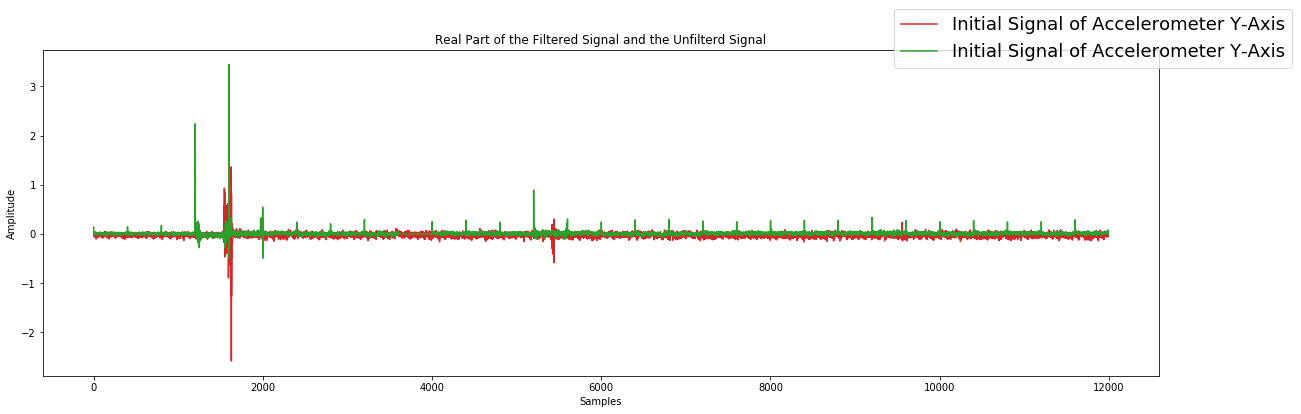

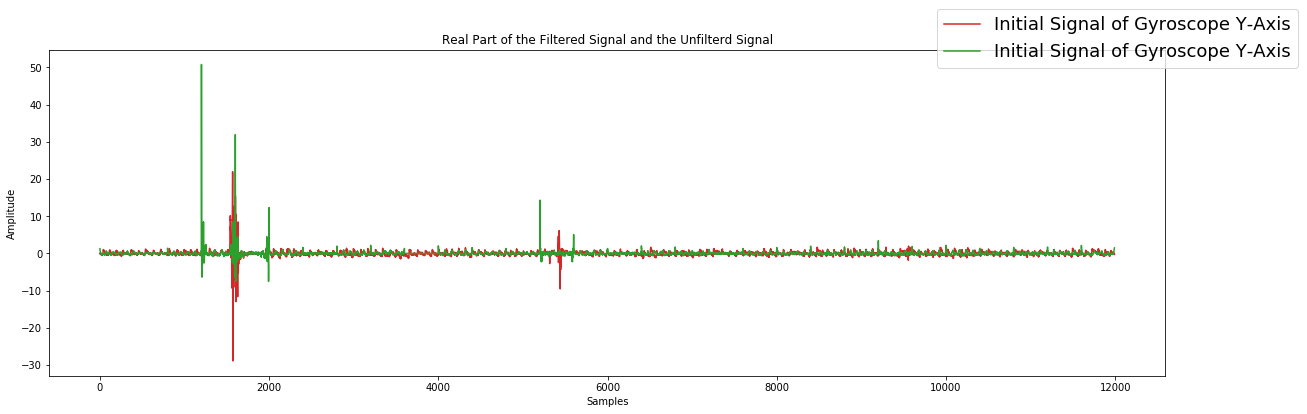

In [316]:
acc_y_wf = wiener(acc_y,acc_y_noise)#plot of the initial and filterd signal
fig= plt.figure(figsize=(20,6))
t = np.linspace(0,len(acc_y_wf),len(acc_y_wf))
plt.plot(t,acc_y, label = "Initial Signal of Accelerometer Y-Axis", color = "C3")
plt.plot(t,acc_y_wf,label = "Initial Signal of Accelerometer Y-Axis", color = "C2")
plt.ylabel("Amplitude")
fig.legend(fontsize=18)
plt.title("Real Part of the Filtered Signal and the Unfilterd Signal")
plt.xlabel("Samples")
plt.show()

gyr_y_wf = wiener(gyr_y,gyr_y_noise)#plot of the initial and filterd signal
fig= plt.figure(figsize=(20,6))
t = np.linspace(0,len(gyr_y_wf),len(gyr_y_wf))
plt.plot(t,gyr_y, label = "Initial Signal of Gyroscope Y-Axis", color = "C3")
plt.plot(t,gyr_y_wf,label = "Initial Signal of Gyroscope Y-Axis", color = "C2")
plt.title("Real Part of the Filtered Signal and the Unfilterd Signal")
fig.legend(fontsize=18)
plt.ylabel("Amplitude")
plt.xlabel("Samples")
plt.show()

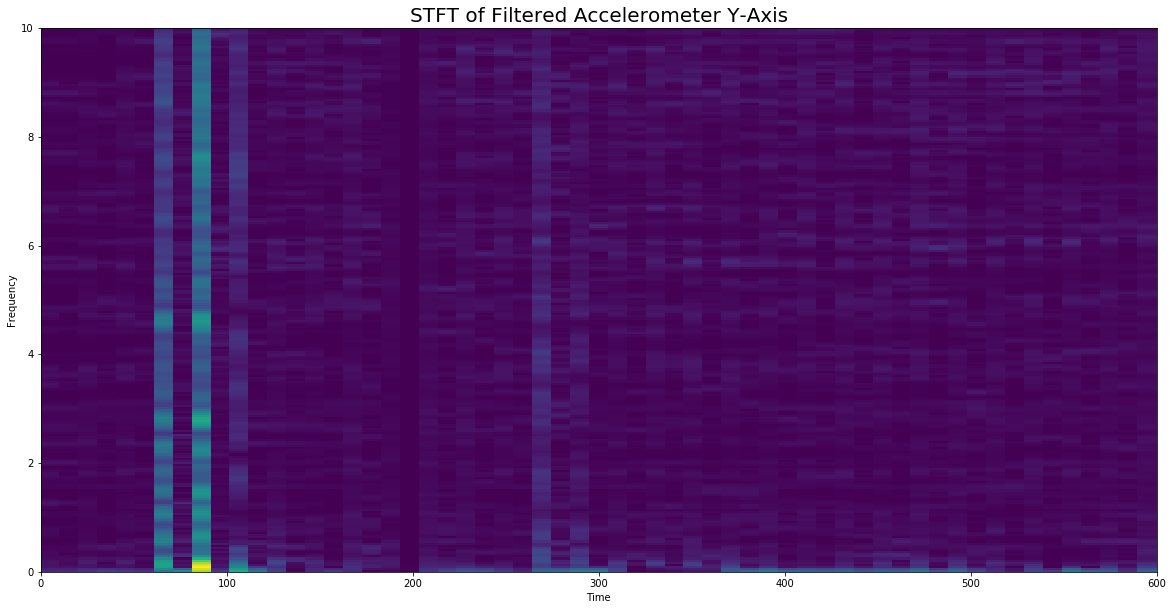

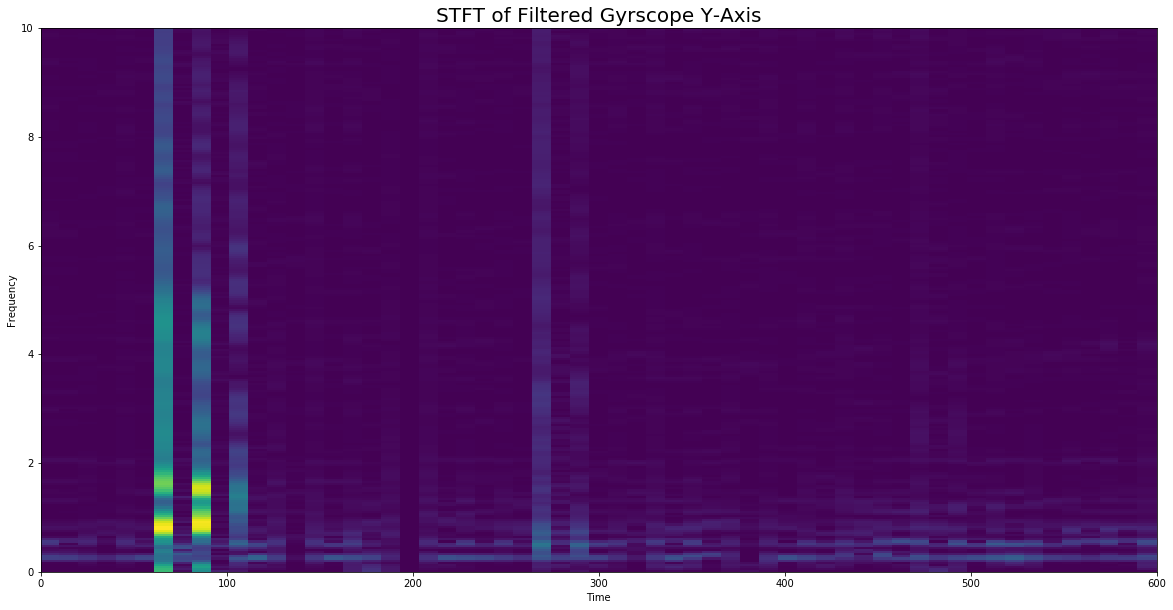

In [317]:
ACC_y_wf = librosa.stft(acc_y_wf, n_fft=512, hop_length = 200 , win_length = 400) 
f = np.linspace(0,fs1/2,ACC_y_wf.shape[0])
t = np.linspace(0,600,ACC_y_wf.shape[1]) 
fig= plt.figure(figsize=(20,10))
plt.pcolormesh(t,f,abs(ACC_y_wf))
plt.title("STFT of Filtered Accelerometer Y-Axis", fontsize=20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

GYR_y_wf = librosa.stft(gyr_y_wf, n_fft=512, hop_length = 200 , win_length = 400) 
f = np.linspace(0,fs1/2,GYR_y_wf.shape[0])
t = np.linspace(0,600,GYR_y_wf.shape[1]) 
fig= plt.figure(figsize=(20,10))
plt.pcolormesh(t,f,abs(GYR_y_wf))
plt.title("STFT of Filtered Gyrscope Y-Axis", fontsize=20)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

Task 4.4

In [318]:
names = os.listdir('/home/mpektkd/hmmy_6th/DSP/DSP20_LAB2')
names = sorted(names)
names = [names[12],names[18],names[34],names[23]]
print(names)

['sleep_11.npz', 'sleep_17.npz', 'step_13.npz', 'step_02.npz']


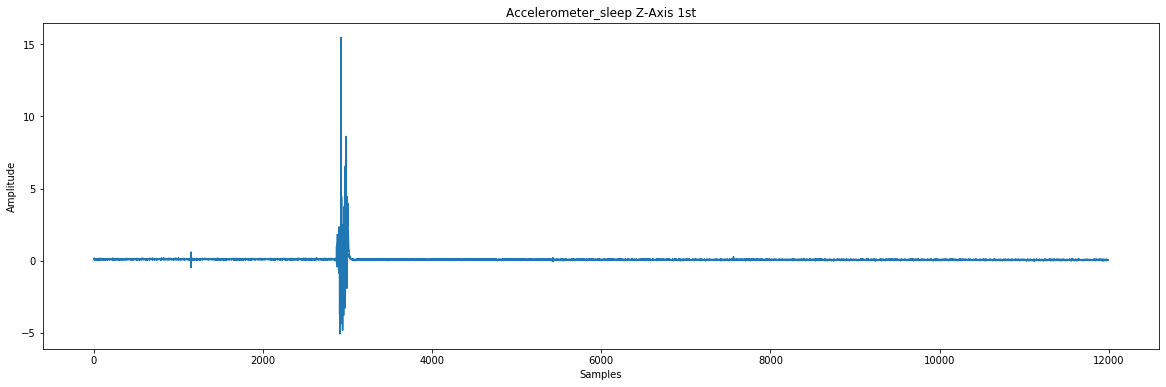

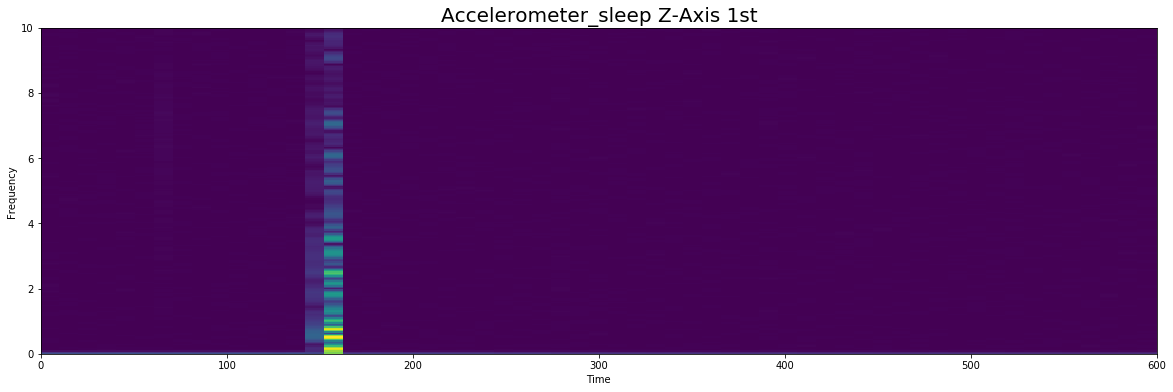

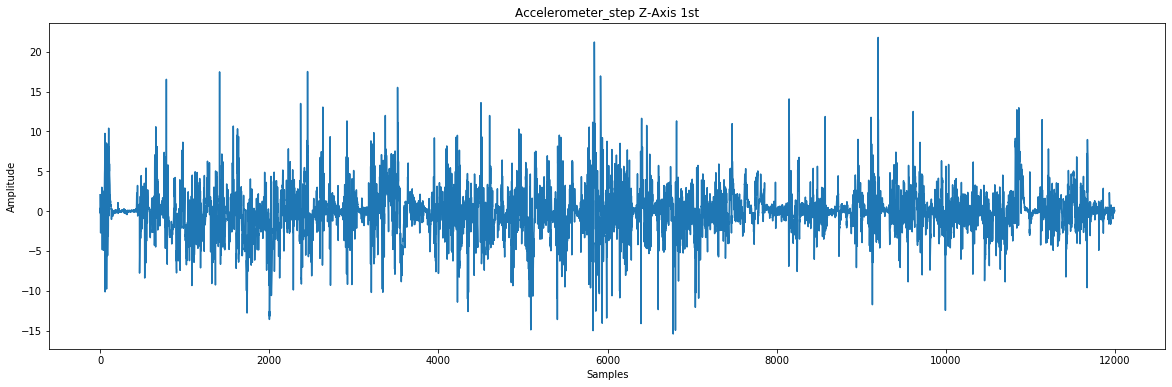

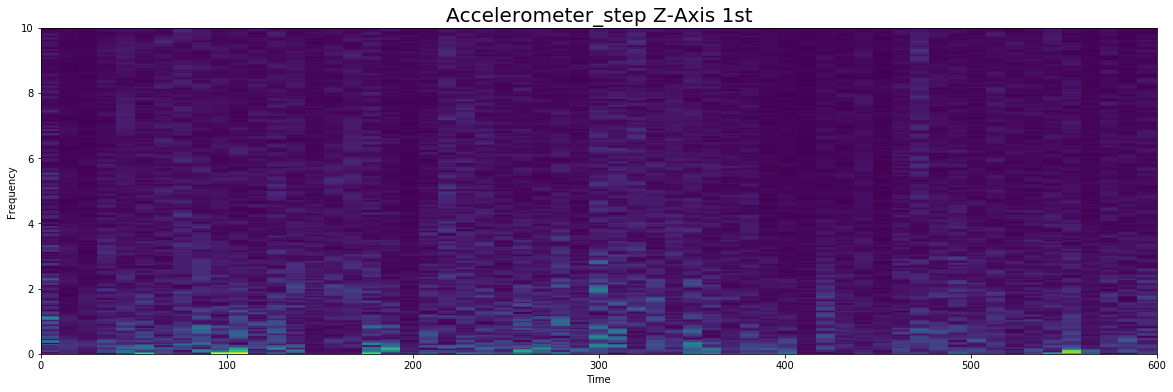

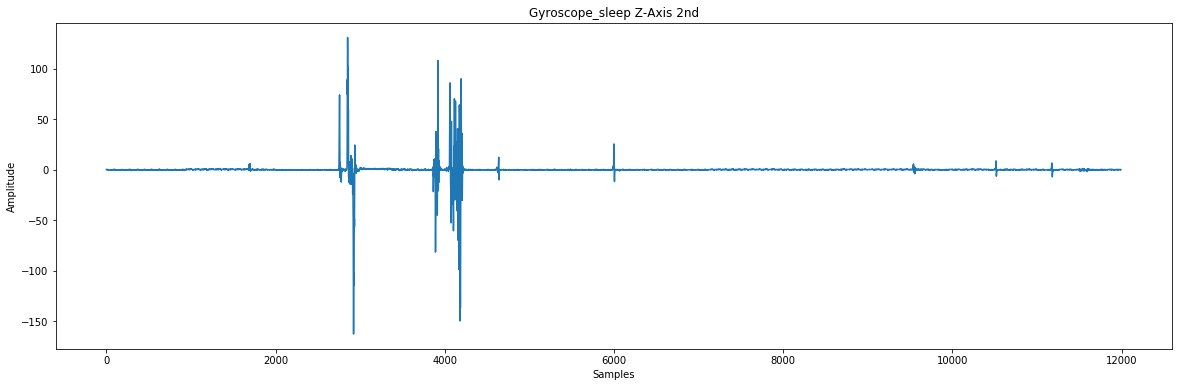

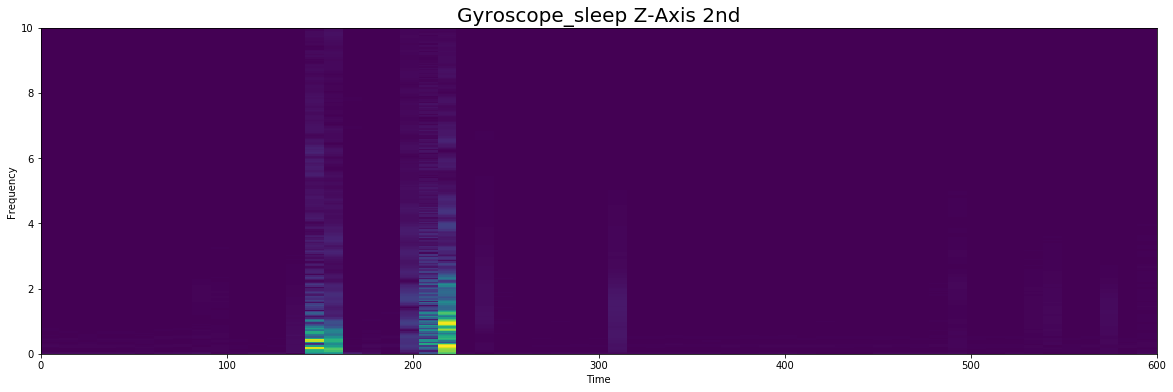

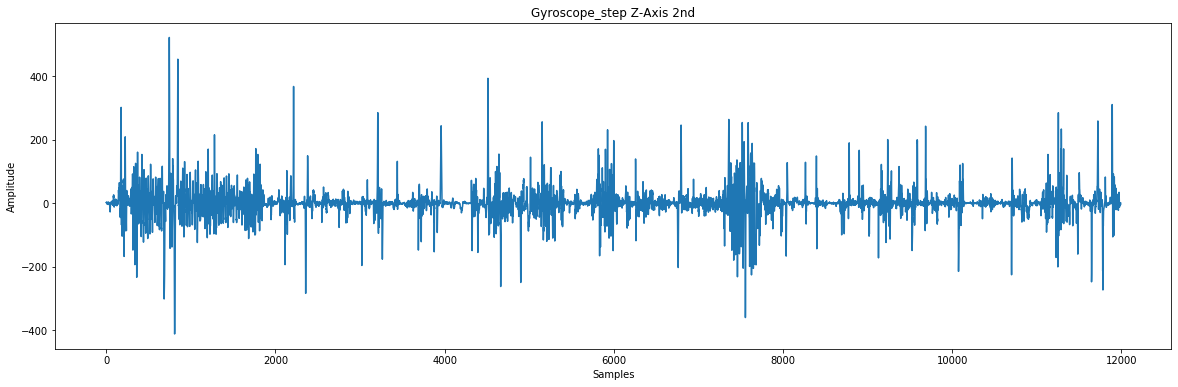

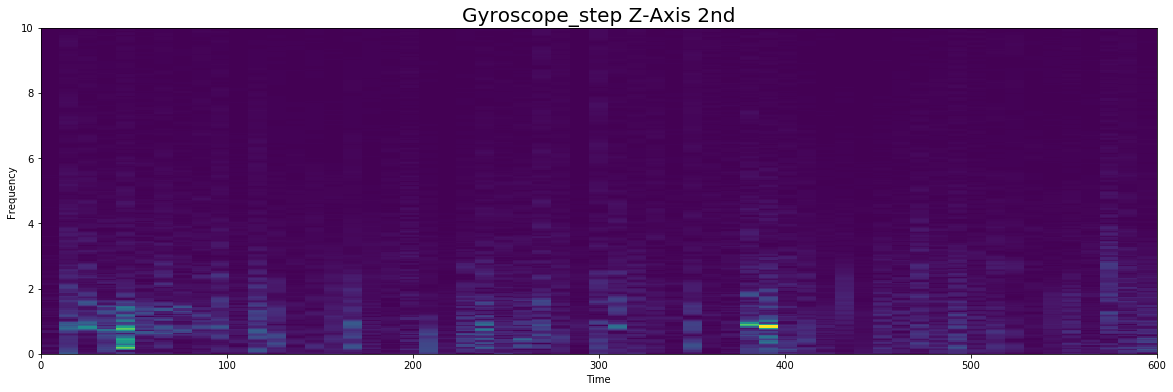

In [319]:
#Wh choose 7th order of Winer Filter for better resolution
N = 7
with np.load('./data/'+names[0]) as data:
    acc = data['acc']
    accz_sleep = acc[:,2]
with np.load('./data/'+names[2]) as data:
    acc = data['acc']
    accz_step = acc[:,2]
with np.load('./data/'+names[1]) as data:
    gyr = data['gyr']
    gyrz_sleep = gyr[:,2]
with np.load('./data/'+names[3]) as data:
    gyr = data['gyr']
    gyrz_step = gyr[:,2]
    
signals = [("Accelerometer_sleep Z-Axis 1st",accz_sleep),("Accelerometer_step Z-Axis 1st",accz_step),("Gyroscope_sleep Z-Axis 2nd",gyrz_sleep),("Gyroscope_step Z-Axis 2nd",gyrz_step)]
for i in range(4):
    n = np.linspace(0,len(signals[i][1]),len(signals[i][1]))
    fig= plt.figure(figsize=(20,6))
    plt.plot(n,signals[i][1])
    plt.title(signals[i][0])
    plt.ylabel("Amplitude")
    plt.xlabel("Samples")
    plt.show()
    
    sign_stft = librosa.stft(signals[i][1], n_fft=512, hop_length = 200 , win_length = 400) 
    f = np.linspace(0,fs1/2,sign_stft.shape[0])
    t = np.linspace(0,600,sign_stft.shape[1]) 
    fig= plt.figure(figsize=(20,6))
    plt.pcolormesh(t,f,abs(sign_stft))
    plt.title(signals[i][0], fontsize=20)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

    


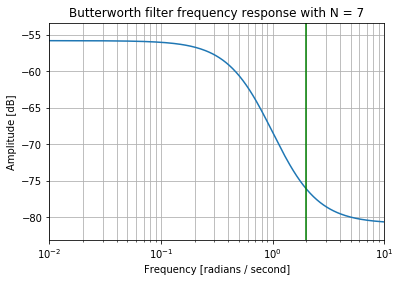

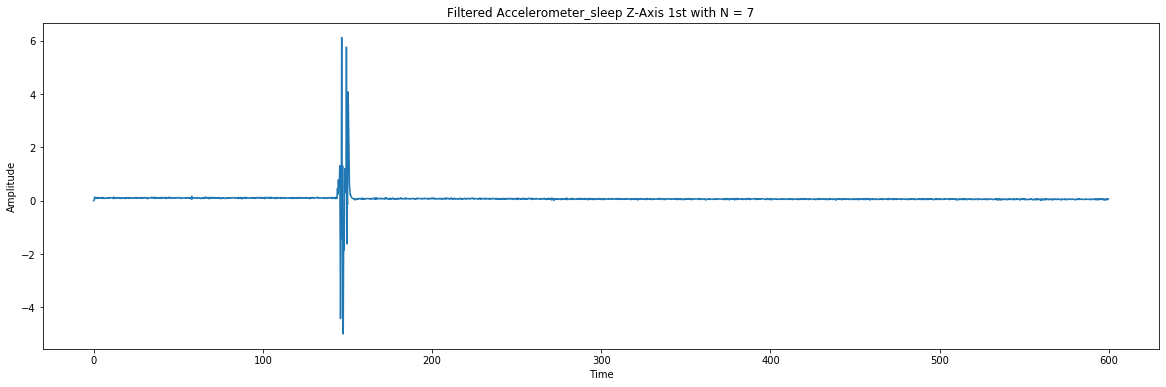

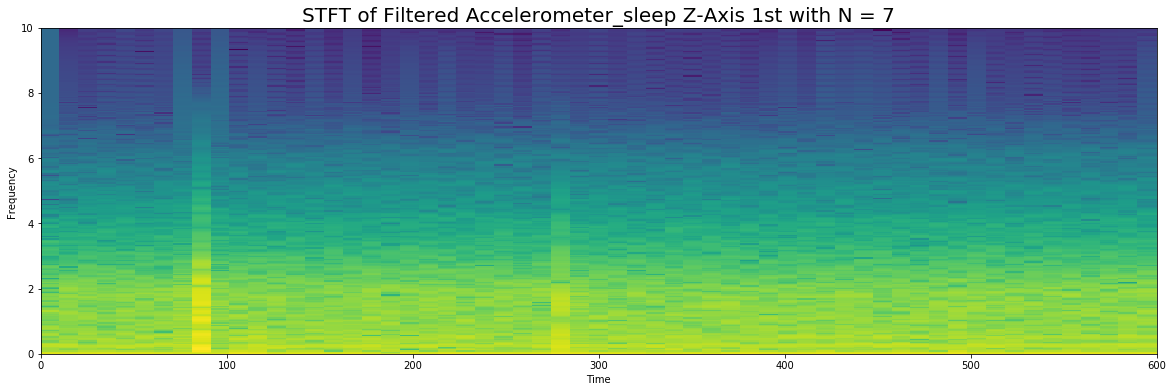

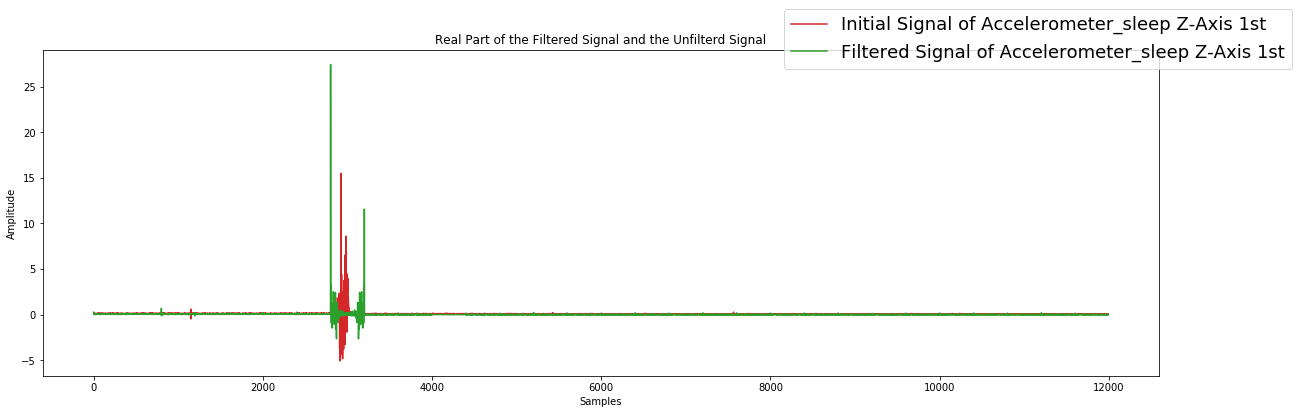

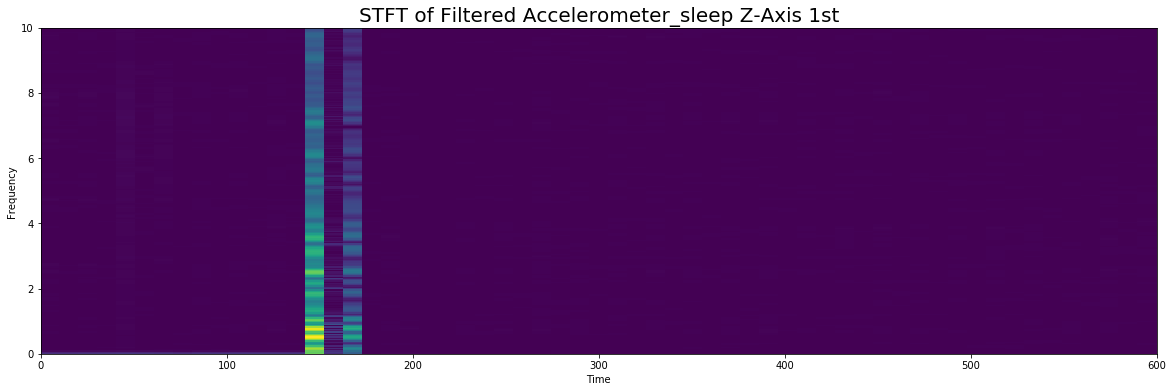

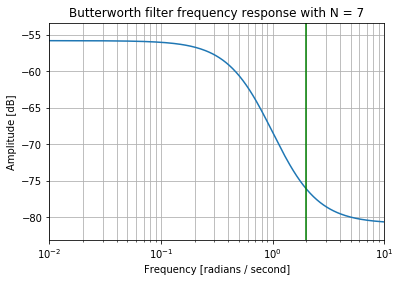

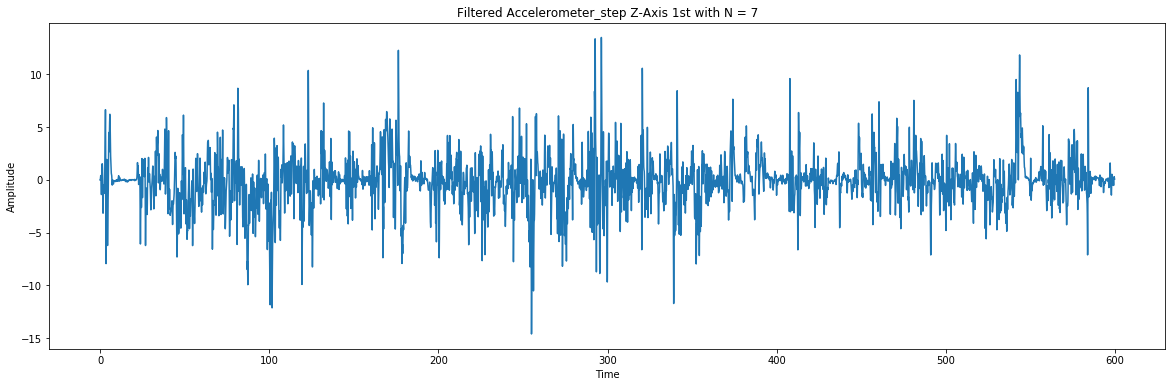

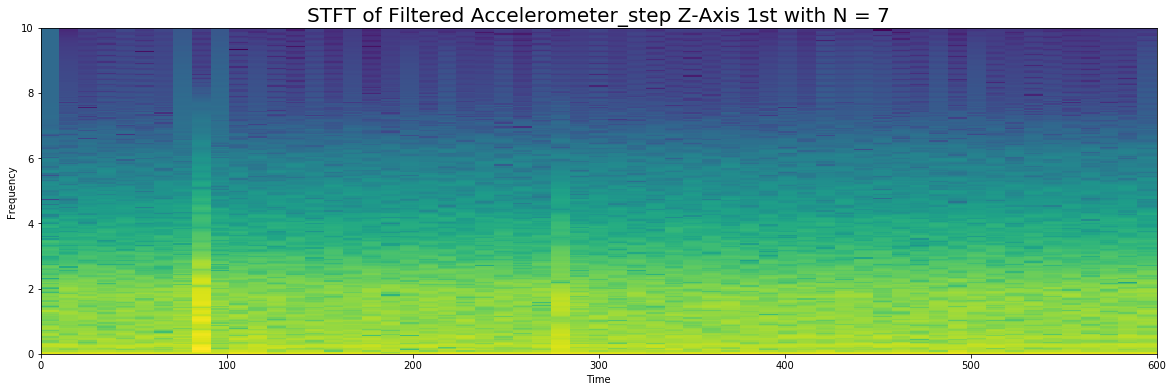

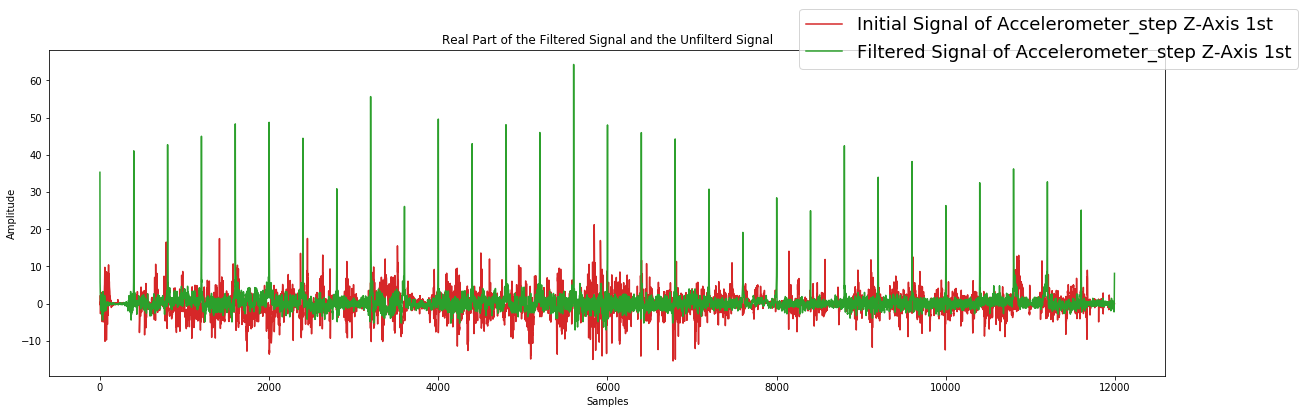

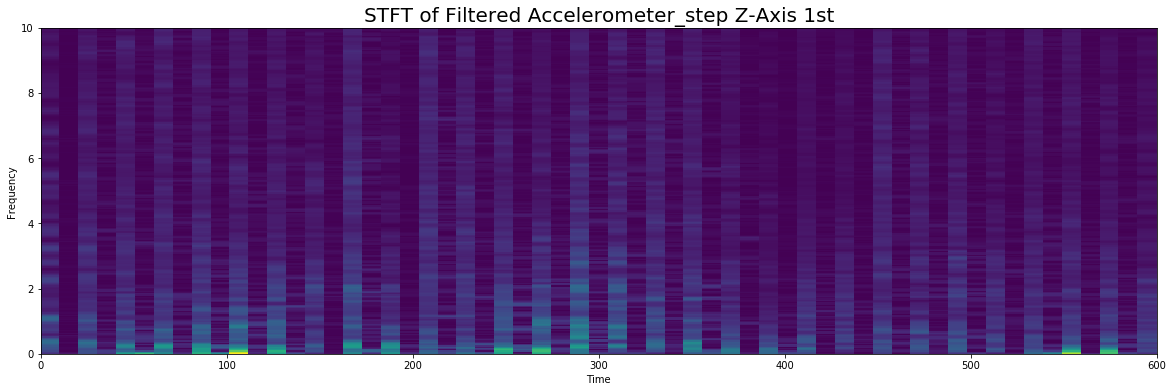

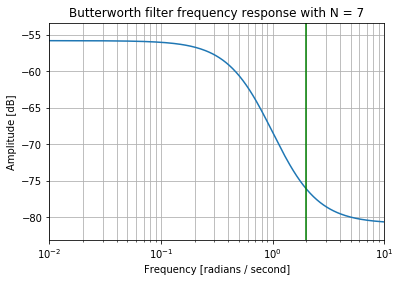

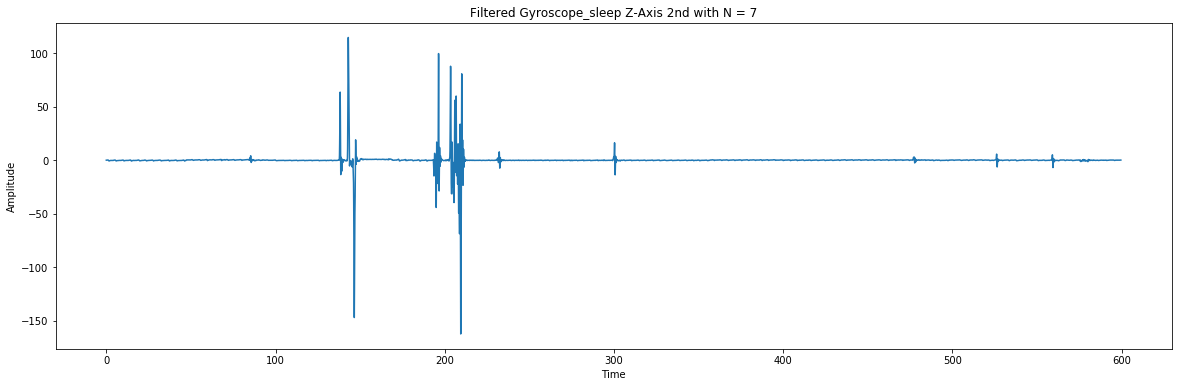

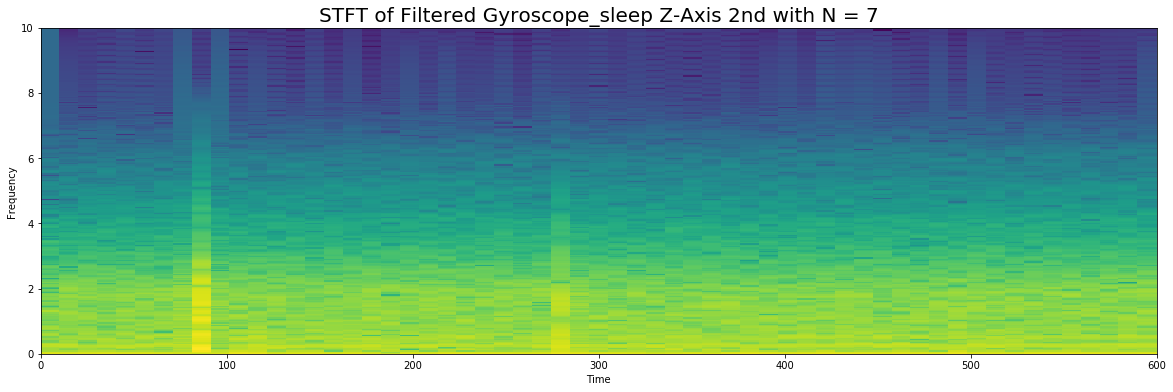

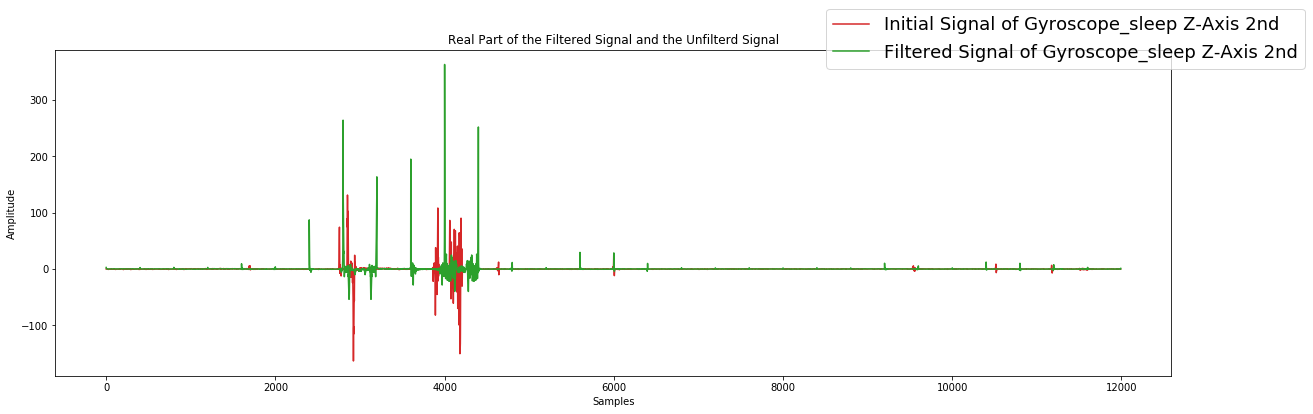

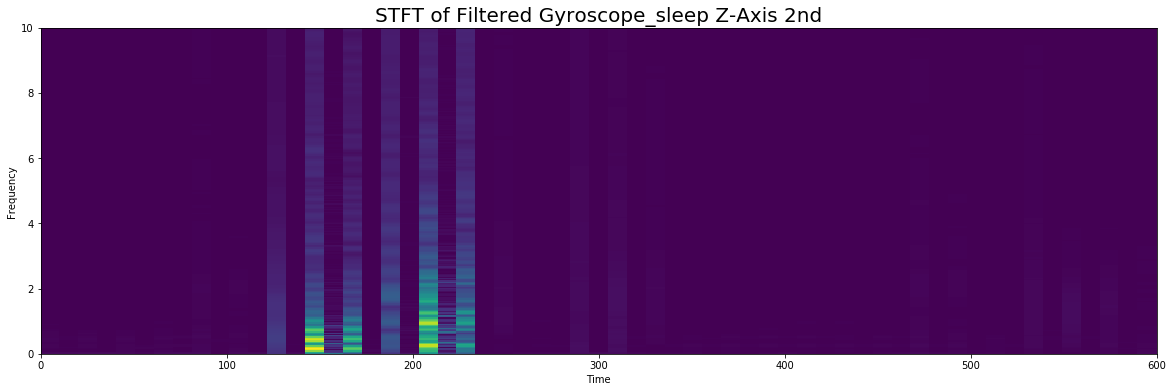

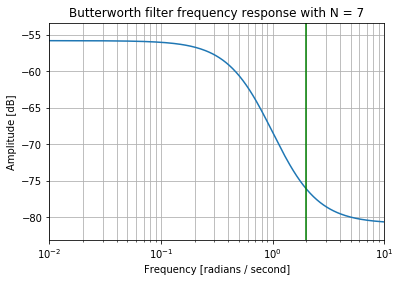

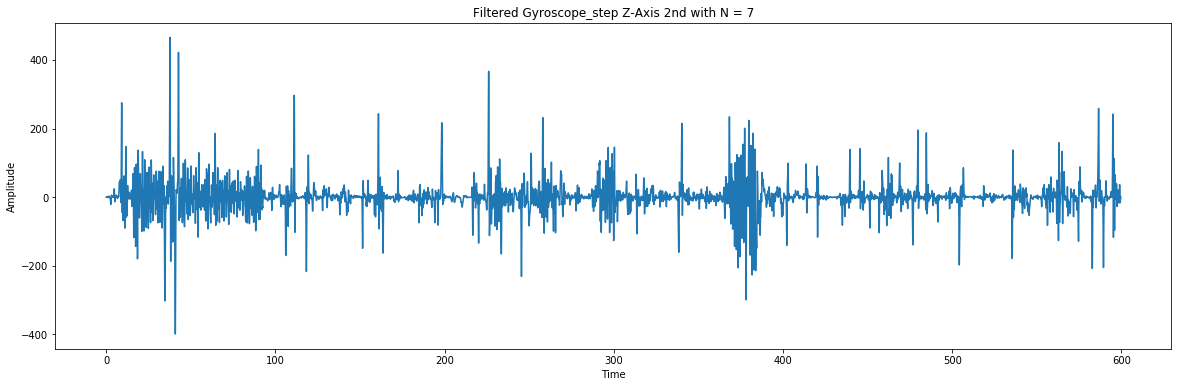

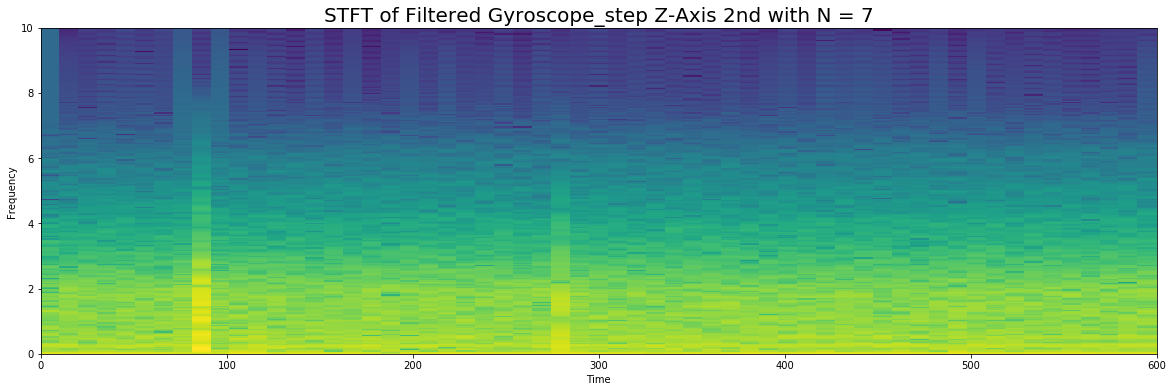

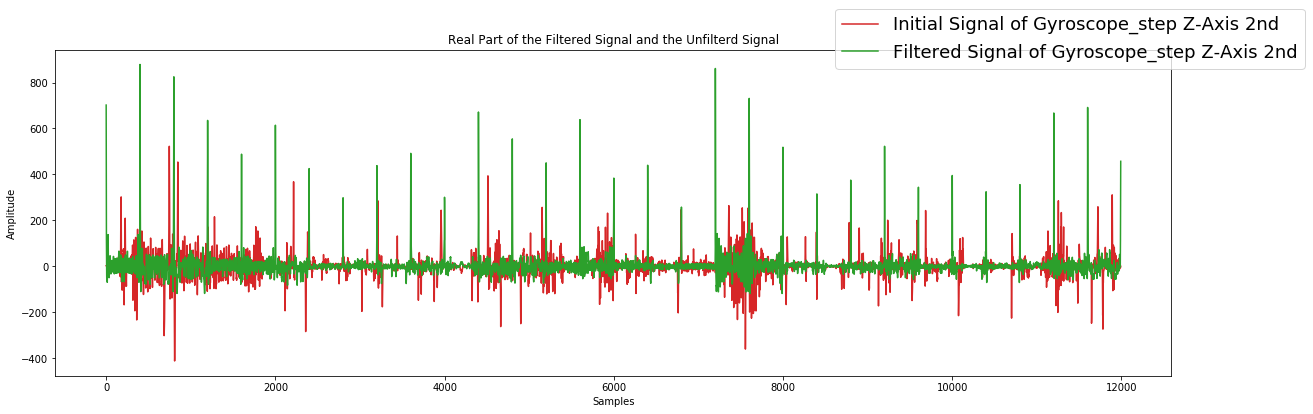

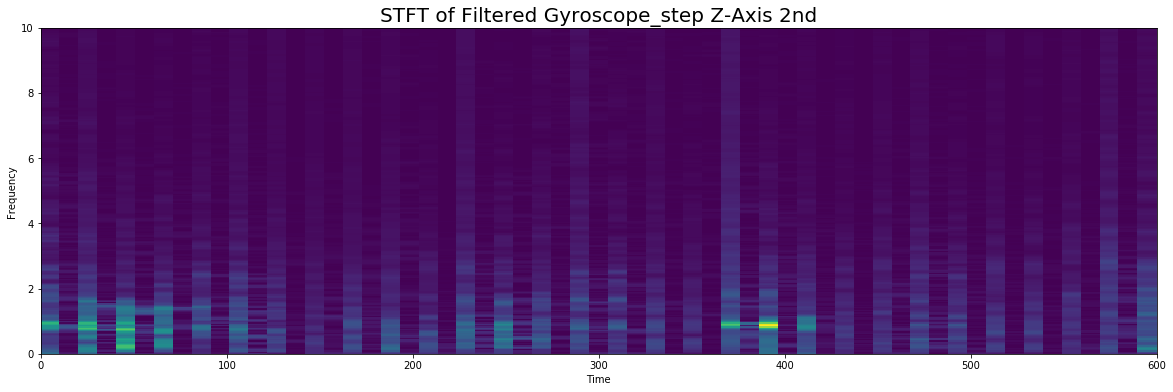

In [320]:
#From the plots
accz_noise_1st_sleep = accz_sleep[4000:4400]
accz_noise_1st_step = accz_sleep[100:500]
gyrz_noise_2nd_sleep = accz_sleep[3100:3500]
gyrz_noise_2nd_step = accz_sleep[10100:10500]
noise=[accz_noise_1st_sleep,accz_noise_1st_step,gyrz_noise_2nd_sleep,gyrz_noise_2nd_step]
for i in range(4):
    butter(signals[i][1],N,signals[i][0])
    wiener_all(signals[i][1],noise[i],signals[i][0])

Task 5

In [396]:
#5.1
hrm = np.load('./data/hrm_orig.npy')
samples = np.cumsum(hrm)/1000 #msec

xp = np.arange(0, samples[-1], 1/5)
cub = sp.interpolate.interp1d(samples, hrm, kind = 'cubic', fill_value = 'extrapolate')
resampled_1= cub(xp)

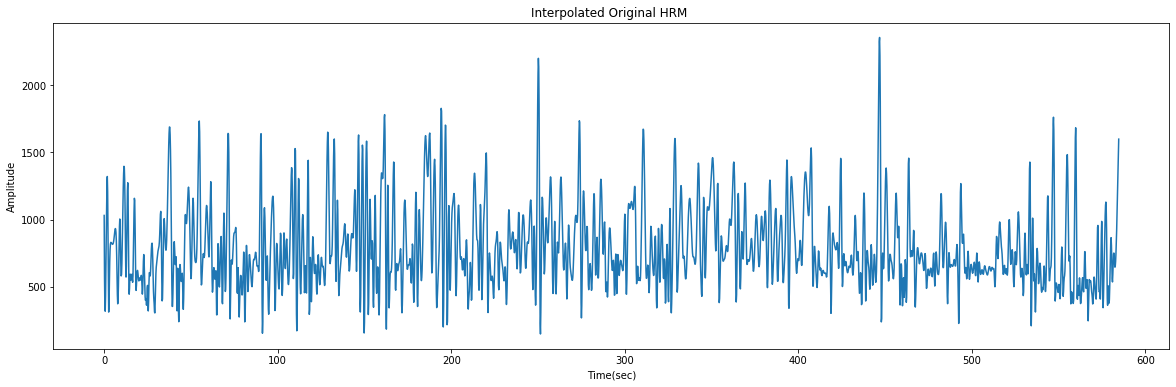

In [397]:
fig= plt.figure(figsize=(20,6))
plt.plot(xp,resampled_1)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")
plt.title("Interpolated Original HRM ")
plt.show()

In [398]:
#5.2
random  = [np.random.uniform(1,100) for _ in range(1000)]
tn = sorted(random)

In [399]:
x = np.zeros(len(tn))
for i,j in zip(tn, range(len(tn))):
    x[j] = np.sin(2*np.pi*i ) + np.cos((2/3)*np.pi*i ) + np.random.uniform(0, 0.1)    

In [400]:
samples = np.cumsum(tn)

In [401]:
xp = np.arange(0, samples[-1], 1/10)
cub = sp.interpolate.interp1d(samples, x, kind = 'cubic', fill_value = 'extrapolate' )
resampled_2= cub(xp)

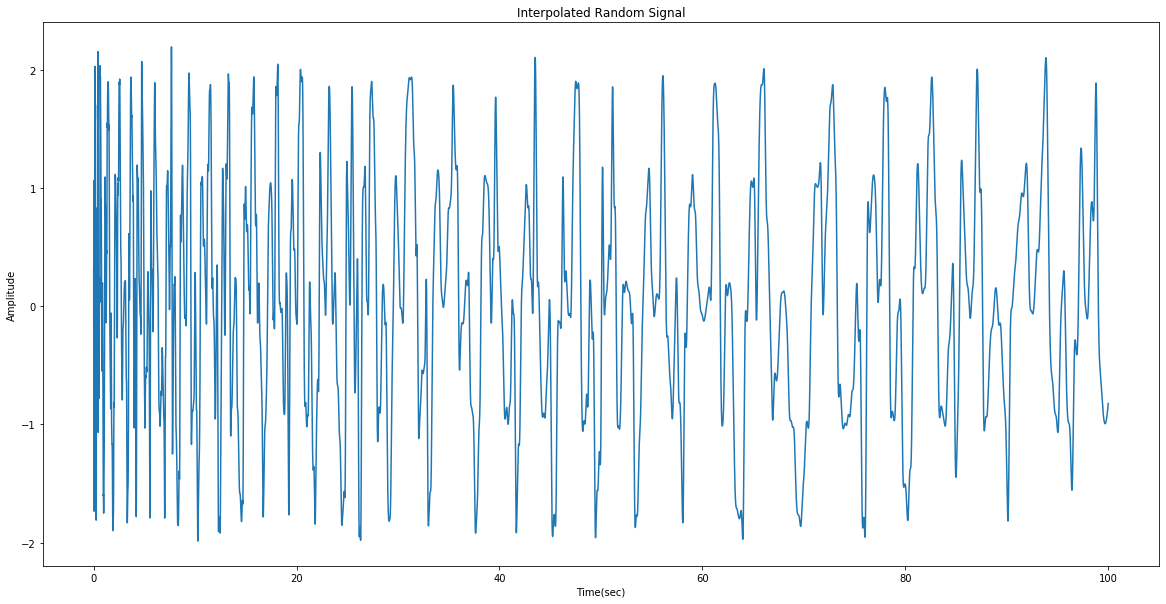

In [402]:
n = np.linspace(0, 100, len(resampled_2))
fig= plt.figure(figsize=(20,10))
plt.plot(n, resampled_2)
plt.title("Interpolated Random Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time(sec)")
plt.show()

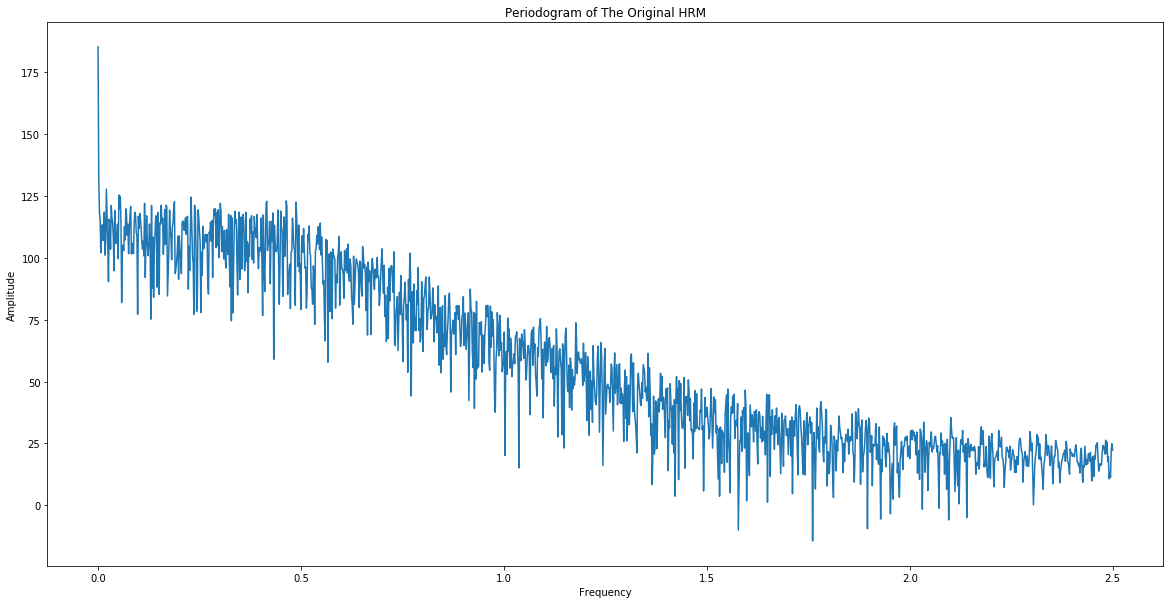

In [403]:
#5.3
s1 = power(resampled_1)
fig= plt.figure(figsize=(20,10))
r = np.linspace(0, 5/2, len(resampled_1)//2)
plt.plot(r, 20*np.log10(s1[0:len(resampled_1)//2]))
plt.title("Periodogram of The Original HRM")
plt.ylabel("Amplitude")
plt.xlabel('Frequency')
plt.show()

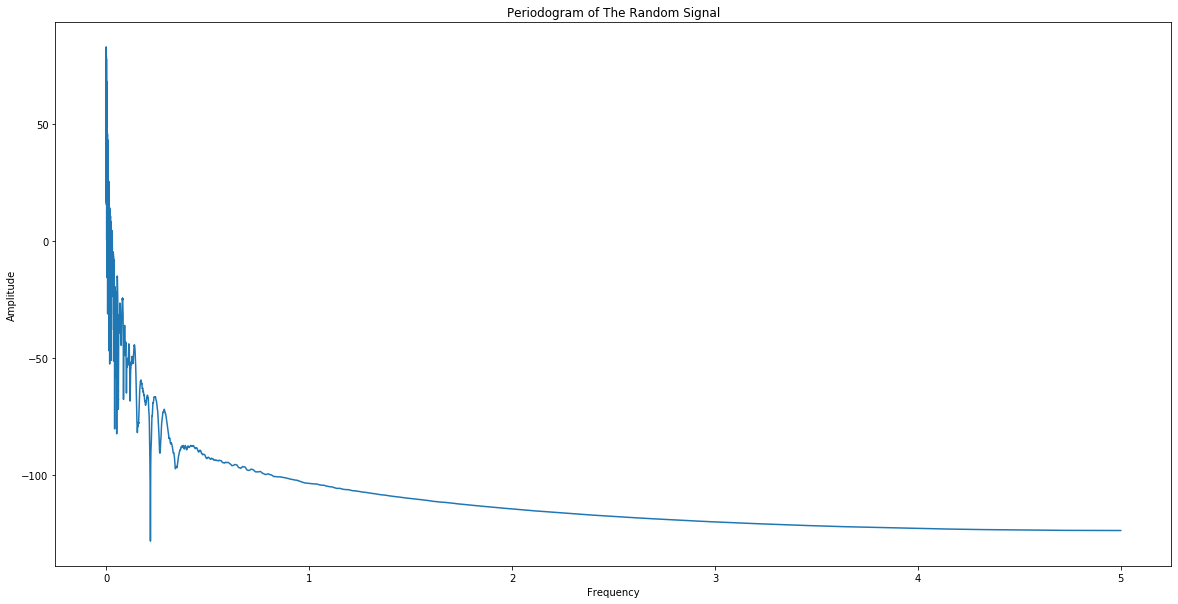

In [405]:
s2 = power(resampled_2)
fig= plt.figure(figsize=(20,10))
f = np.linspace(0, 5, len(resampled_2)//2)
plt.plot(f, 20*np.log10(s2[0:len(resampled_2)//2]))
plt.title("Periodogram of The Random Signal")
plt.ylabel("Amplitude")
plt.xlabel('Frequency')
plt.show()